In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_7692\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048571 entries, 0 to 1048570
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Time/sec     1048571 non-null  object 
 1   Potential/V  1048571 non-null  float64
 2   Current/A    1048571 non-null  float64
 3   Charge/C     1048571 non-null  float64
dtypes: float64(3), object(1)
memory usage: 32.0+ MB


In [6]:
df.shape

(1048571, 4)

In [7]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [8]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [9]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [10]:
# df.drop(['Time'], axis=1,inplace=True)  # deleting the Time column

In [11]:
# df['Time'].iloc[994881]

In [12]:
df.shape

(994879, 4)

In [13]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [14]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

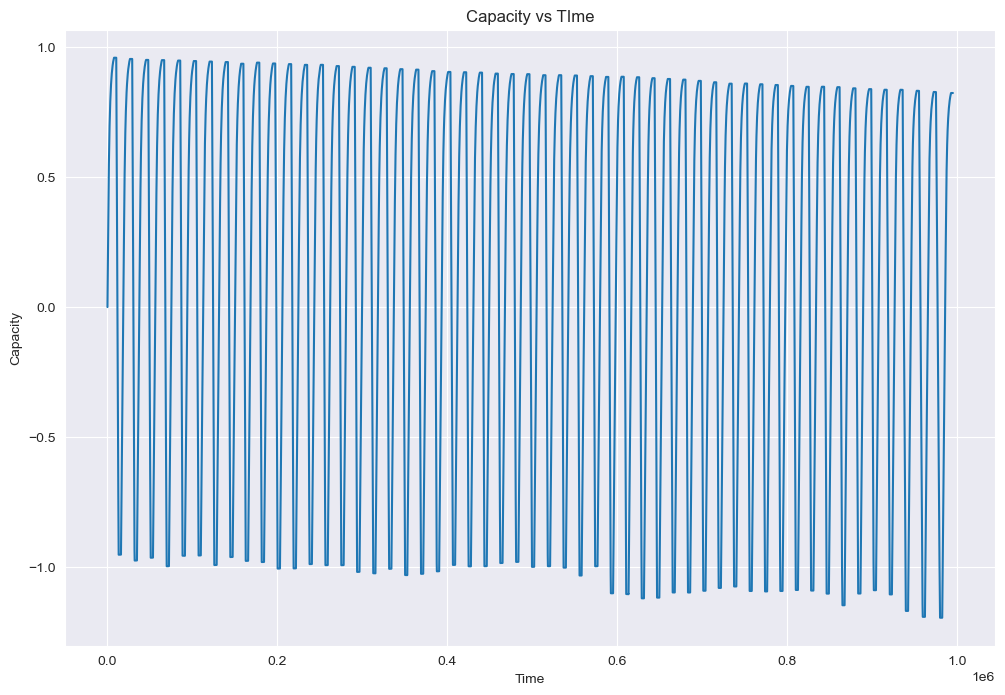

In [16]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Data Cleaning

In [17]:
# df.fillna(value=0, inplace=True)

In [18]:
# df.isnull().sum()

In [19]:
# df.info()

# Local Maxima and Minima

In [20]:
# %%time
# from scipy.signal import argrelextrema
# import numpy as np

# ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
# ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

# df.Capacity.plot(figsize=(20,12), alpha=.3)
# # filter prices that are peaks and plot them differently to be visable on the plot
# df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
# df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
# plt.ylabel("Capacity")
# plt.xlabel("Time")
# plt.title('Local Maxima and Local Minima')

In [21]:
# maximum_point = df['Capacity'][ilocs_max].unique()
# minimum_point = df['Capacity'][ilocs_min].unique()

In [22]:
# print(maximum_point)
# print(maximum_point.max())
# print(minimum_point)

In [23]:
# df.insert(loc = 4,column ='Energy',value=df['Capacity']*df["Potential"]) # do add if needed 

In [24]:
# df.insert(loc = 5,column ='Power',value=df['Current']*df["Potential"])

In [25]:
df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [26]:
charge = df.pop('Charge')

In [27]:
df.head(20)

,Time,Potential,Current,Capacity,SOC
0,0.5,3.94214,1.24797,0.000000,0.000000
1,1.0,3.94504,1.24789,0.000227,0.000237
2,2.0,3.94806,1.24790,0.000601,0.000626
3,3.0,3.95068,1.24790,0.000927,0.000966
4,4.0,3.95281,1.24790,0.001298,0.001352
5,5.0,3.95467,1.24789,0.001624,0.001692
6,6.0,3.95637,1.24791,0.001995,0.002078
7,7.0,3.95793,1.24789,0.002321,0.002417
8,8.0,3.95938,1.24790,0.002692,0.002804
9,9.0,3.96077,1.24789,0.003017,0.003143


In [28]:
# # Capacity Vs Time
# sns.set_style("darkgrid")
# plt.figure(figsize=(12, 8))
# plt.plot(df['Charge'])
# plt.ylabel('Charge')
# adf = plt.gca().get_xaxis().get_major_formatter()
# plt.xlabel('Time')
# plt.title('Capacity vs TIme')

# Integral current

In [29]:
# from scipy.integrate import cumulative_trapezoid

# p = df["Time"][:df.shape[0]]
# q = df["Current"][:df.shape[0]]

# integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

# df.loc[:, "Integral_current"] = integral

In [30]:
# sns.set_style("darkgrid")
# plt.figure(figsize=(14, 10))
# plt.plot(df['SOC'],color='orange')
# plt.plot(df['Integral_current'],color='green')
# plt.ylabel('Integral_Current')
# plt.xlabel('Time')
# plt.legend(["Soc", "Integral current"], loc ="upper left")
# plt.title('Dataset')

In [31]:
df.isnull().sum()

Time         0
Potential    0
Current      0
Capacity     0
SOC          0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   SOC        994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


In [33]:
df.describe()

,Time,Potential,Current,Capacity,SOC
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,0.152622
std,288767.217690,0.382038,1.142440,0.752569,0.783926
min,0.500000,2.750290,-2.503150,-1.195086,-1.244881
25%,250933.600000,3.475400,0.000000,-0.602635,-0.627745
50%,501905.600000,4.147310,0.072232,0.455186,0.474152
75%,751231.300000,4.199370,0.795196,0.839904,0.874900
max,999999.600000,4.199950,1.364510,0.959319,0.999291


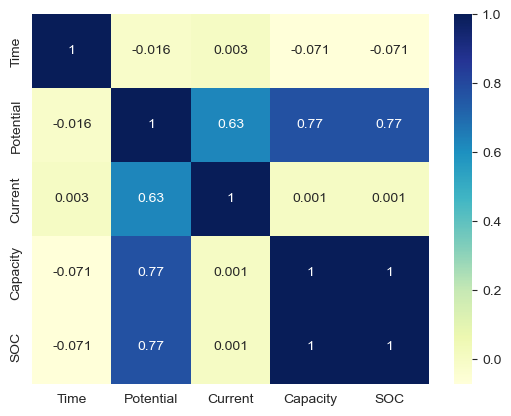

<Figure size 1400x1000 with 0 Axes>

In [34]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

# Modeling

In [35]:
# time = df.pop('Time')

In [36]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Capacity'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [37]:
df.head()

,Time,Potential,Current,Capacity,SOC
0,0.000000e+00,0.822158,0.969868,0.554717,0.000000
1,5.000005e-07,0.824159,0.969847,0.554823,0.000237
2,1.500001e-06,0.826242,0.969850,0.554996,0.000626
3,2.500002e-06,0.828049,0.969850,0.555148,0.000966
4,3.500003e-06,0.829519,0.969850,0.555320,0.001352


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   SOC        994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


In [39]:
Y = df.pop('SOC')
X = df

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [41]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((795903, 4), (198976, 4), (795903,), (198976,))

In [42]:
X_train.head()

,Time,Potential,Current,Capacity
541,0.000541,0.930611,0.969744,0.641690
17533,0.017702,0.801698,0.970186,0.375075
73479,0.074157,0.760978,0.970026,0.274182
411116,0.414878,0.823841,0.969734,0.420655
199479,0.201183,0.203434,0.000259,0.316211


In [43]:
Y_train.head()

541       0.195182
17533    -0.403148
73479    -0.629569
411116   -0.300859
199479   -0.535249
Name: SOC, dtype: float64

In [44]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [45]:
# # https://stackoverflow.com/questions/44475682/cross-validation-in-deep-neural-networks

# from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
# kf =KFold(n_splits=5, shuffle=True, random_state=42)

# cnt = 1
# # split()  method generate indices to split data into training and test set.
# for train_index, test_index in kf.split(X, Y):
#     print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
#     cnt += 1

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [48]:
X_train.head()

,Time,Potential,Current,Capacity
541,0.000541,0.930611,0.969744,0.641690
17533,0.017702,0.801698,0.970186,0.375075
73479,0.074157,0.760978,0.970026,0.274182
411116,0.414878,0.823841,0.969734,0.420655
199479,0.201183,0.203434,0.000259,0.316211


# Function for the AIC (Akaike information cirteria)

In [49]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

In [50]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(150,activation = 'linear'),
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=32,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 33s 1ms/step - loss: 0.0064 - rmse: 0.0205 - mae: 0.0064 - mse: 4.2119e-04 - mape: 7.9717 - val_loss: 0.0020 - val_rmse: 0.0021 - val_mae: 0.0020 - val_mse: 4.6141e-06 - val_mape: 0.7842
Epoch 2/100
24872/24872 [==============================] - 36s 1ms/step - loss: 0.0018 - rmse: 0.0024 - mae: 0.0018 - mse: 5.5402e-06 - mape: 3.0002 - val_loss: 3.5714e-04 - val_rmse: 3.8994e-04 - val_mae: 3.5714e-04 - val_mse: 1.5205e-07 - val_mape: 0.2086
Epoch 3/100
24872/24872 [==============================] - 34s 1ms/step - loss: 0.0011 - rmse: 0.0015 - mae: 0.0011 - mse: 2.1097e-06 - mape: 2.4341 - val_loss: 6.7133e-04 - val_rmse: 8.8652e-04 - val_mae: 6.7133e-04 - val_mse: 7.8593e-07 - val_mape: 0.4893
Epoch 4/100
24872/24872 [==============================] - 36s 1ms/step - loss: 8.2564e-04 - rmse: 0.0011 - mae: 8.2564e-04 - mse: 1.1463e-06 - mape: 1.6683 - val_loss: 0.0013 - val_rmse: 0.0015 - val_mae: 0.0013 - val_mse: 2.1746e-06 - v

24872/24872 [==============================] - 63s 3ms/step - loss: 9.8153e-05 - rmse: 1.2709e-04 - mae: 9.8153e-05 - mse: 1.6152e-08 - mape: 0.2766 - val_loss: 6.7432e-05 - val_rmse: 7.6605e-05 - val_mae: 6.7432e-05 - val_mse: 5.8684e-09 - val_mape: 0.0361
Epoch 32/100
24872/24872 [==============================] - 64s 3ms/step - loss: 9.7379e-05 - rmse: 1.2563e-04 - mae: 9.7379e-05 - mse: 1.5782e-08 - mape: 0.2357 - val_loss: 7.7122e-05 - val_rmse: 9.0405e-05 - val_mae: 7.7122e-05 - val_mse: 8.1731e-09 - val_mape: 0.0408
Epoch 33/100
24872/24872 [==============================] - 63s 3ms/step - loss: 9.3282e-05 - rmse: 1.2012e-04 - mae: 9.3282e-05 - mse: 1.4429e-08 - mape: 0.3234 - val_loss: 5.9981e-05 - val_rmse: 6.5130e-05 - val_mae: 5.9981e-05 - val_mse: 4.2419e-09 - val_mape: 0.0387
Epoch 34/100
24872/24872 [==============================] - 64s 3ms/step - loss: 9.0797e-05 - rmse: 1.1753e-04 - mae: 9.0797e-05 - mse: 1.3814e-08 - mape: 0.3451 - val_loss: 1.5709e-04 - val_rmse: 1.5

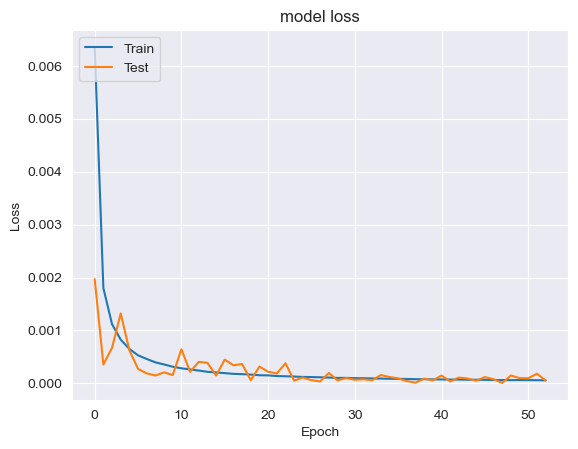

In [51]:
plot_his(history_1)

In [52]:
model_1.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 5.5473e-05 - rmse: 6.1902e-05 - mae: 5.5473e-05 - mse: 3.8319e-09 - mape: 0.0229


[5.5472944950452074e-05,
 6.19022102910094e-05,
 5.5472944950452074e-05,
 3.831883699234595e-09,
 0.02286822535097599]

In [53]:
Y_pred_1 = model_1.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [54]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               750       
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 20,951
Trainable params: 20,951
Non-trainable params: 0
_________________________________________________________________


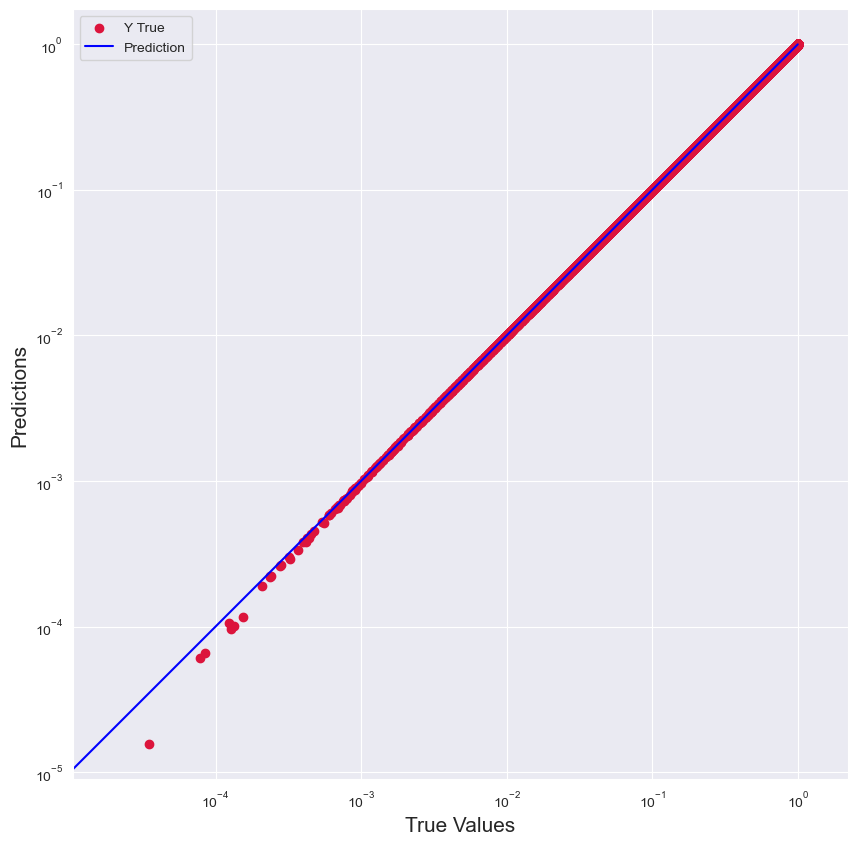

In [169]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_1, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_1), max(Y_test))
p2 = min(min(Y_pred_1), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [55]:
AIC_value(model_1,Y_pred_1,Y_test)

AIC:  41901.582


In [56]:
model_1.save('Saved_models/model_1_SOCesti.h5')

In [57]:
# # AIC 1

# import tensorflow as tf
# from scipy.stats import norm

# # Train your model using TensorFlow
# model = model_1

# Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
# Y_pred_1 = np.asarray(Y_pred_1).astype('float32').reshape((-1,1))


# # Calculate the negative log-likelihood of the model's parameters based on the training data
# nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

# # Calculate the number of parameters in the model
# num_params = model_1.count_params()

# # Calculate the AIC value for the model
# aic = 2 * num_params - 2 * nll

# # Print the AIC value
# print("AIC: ", aic.numpy())

In [58]:
# # AIC 2
# # Get the model's maximum likelihood estimate of the parameters
# params = model_1.get_weights()[0]

# # Calculate the negative log-likelihood of the model's parameters based on the training data
# nll = -np.sum(Y_train * np.log(model_1.predict(X_train)) + (1 - Y_train) * np.log(1 - model_1.predict(X_train)))

# # Calculate the number of parameters in the model
# num_params = len(params)

# # Calculate the AIC value for the model
# aic = 2 * num_params - 2 * nll

# # Print the AIC value
# print("AIC: ", aic)





'''
Showing the error : MemoryError: Unable to allocate 4.61 TiB for an array with shape (795903, 795903) and data type float64
'''

'\nShowing the error : MemoryError: Unable to allocate 4.61 TiB for an array with shape (795903, 795903) and data type float64\n'

# Function for the BIC (Baysian information criteria)

In [59]:
# # BIC
# log_likelihood = np.sum(np.log(Y_pred_1) * Y_test)

# # Calculate the BIC
# n = len(X_test)
# k = model_1.count_params()
# bic = -2 * log_likelihood + k * np.log(n)
# print(bic)

# Model 2

In [60]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.0026 - rmse: 0.0175 - mae: 0.0026 - mse: 3.0713e-04 - mape: 3.2758 - val_loss: 2.9347e-04 - val_rmse: 3.3125e-04 - val_mae: 2.9347e-04 - val_mse: 1.0973e-07 - val_mape: 0.2182
Epoch 2/100
24872/24872 [==============================] - 59s 2ms/step - loss: 3.7339e-04 - rmse: 4.9068e-04 - mae: 3.7339e-04 - mse: 2.4077e-07 - mape: 0.6635 - val_loss: 4.1547e-04 - val_rmse: 4.4769e-04 - val_mae: 4.1547e-04 - val_mse: 2.0042e-07 - val_mape: 0.2840
Epoch 3/100
24872/24872 [==============================] - 58s 2ms/step - loss: 2.2309e-04 - rmse: 2.8964e-04 - mae: 2.2309e-04 - mse: 8.3890e-08 - mape: 0.7719 - val_loss: 1.1834e-04 - val_rmse: 1.3532e-04 - val_mae: 1.1834e-04 - val_mse: 1.8312e-08 - val_mape: 0.0881
Epoch 4/100
24872/24872 [==============================] - 59s 2ms/step - loss: 1.5787e-04 - rmse: 2.0341e-04 - mae: 1.5787e-04 - mse: 4.1375e-08 - mape: 0.8929 - val_loss: 2.5604e-04 - val_rmse: 2.6890

24872/24872 [==============================] - 57s 2ms/step - loss: 1.8054e-05 - rmse: 2.3147e-05 - mae: 1.8054e-05 - mse: 5.3580e-10 - mape: 0.0328 - val_loss: 2.7841e-05 - val_rmse: 3.1696e-05 - val_mae: 2.7841e-05 - val_mse: 1.0046e-09 - val_mape: 0.0185
Epoch 32/100
24872/24872 [==============================] - 60s 2ms/step - loss: 1.7695e-05 - rmse: 2.2833e-05 - mae: 1.7695e-05 - mse: 5.2136e-10 - mape: 0.0691 - val_loss: 9.7981e-06 - val_rmse: 1.1246e-05 - val_mae: 9.7981e-06 - val_mse: 1.2648e-10 - val_mape: 0.0060
Epoch 32: early stopping
CPU times: total: 46min 54s
Wall time: 31min 23s


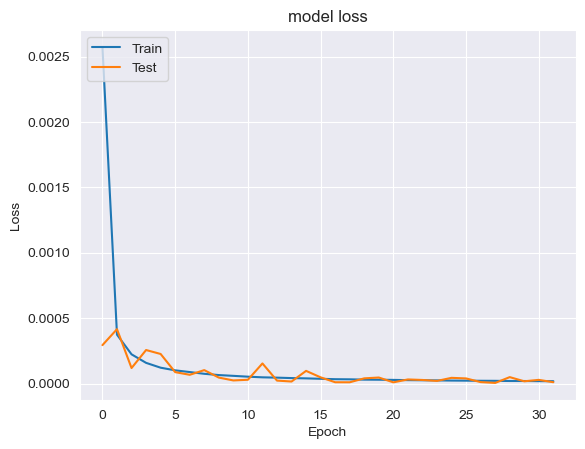

In [61]:
plot_his(history_2)

In [62]:
model_2.evaluate(X_test,Y_test)

6218/6218 [==============================] - 10s 2ms/step - loss: 9.7981e-06 - rmse: 1.1246e-05 - mae: 9.7981e-06 - mse: 1.2648e-10 - mape: 0.0060


[9.79806554823881e-06,
 1.1246314898016863e-05,
 9.79806554823881e-06,
 1.2647960456746432e-10,
 0.005952281877398491]

In [63]:
Y_pred_2 = model_2.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [64]:
AIC_value(model_2,Y_pred_2,Y_test)

AIC:  11201.583


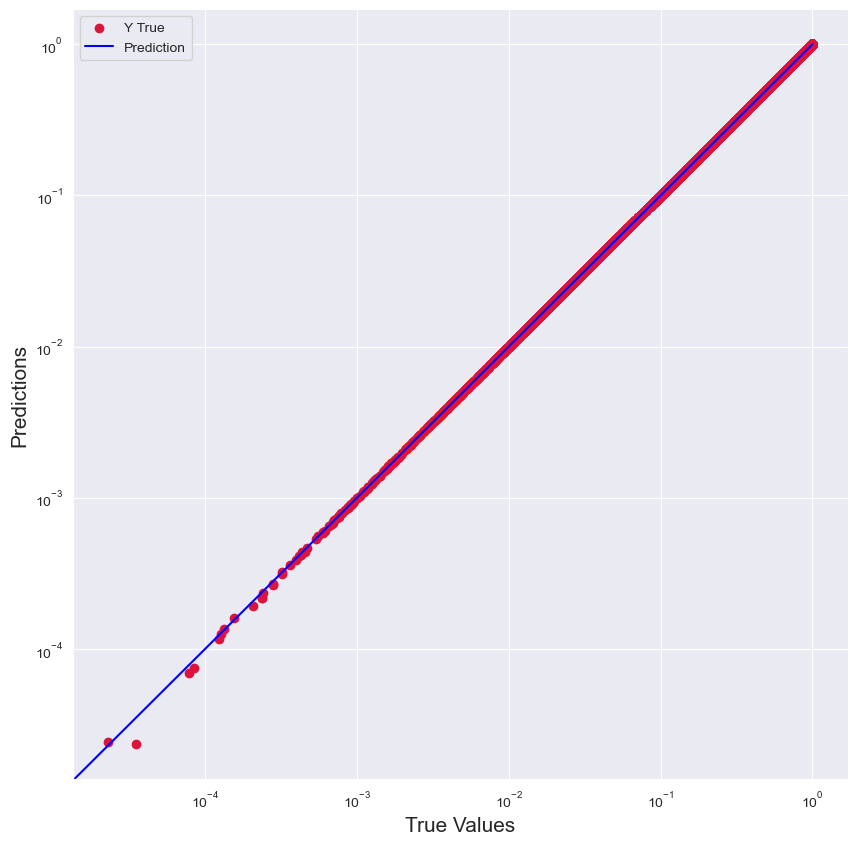

In [170]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_2), max(Y_test))
p2 = min(min(Y_pred_2), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [65]:
model_2.save('Saved_models/model_2_SOCesti.h5')

# Model 3

In [66]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 62s 2ms/step - loss: 0.0055 - rmse: 0.0354 - mae: 0.0055 - mse: 0.0012 - mape: 8.4663 - val_loss: 0.0016 - val_rmse: 0.0018 - val_mae: 0.0016 - val_mse: 3.2659e-06 - val_mape: 0.8027
Epoch 2/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.0013 - rmse: 0.0017 - mae: 0.0013 - mse: 2.9348e-06 - mape: 4.9410 - val_loss: 9.8866e-04 - val_rmse: 0.0013 - val_mae: 9.8866e-04 - val_mse: 1.5846e-06 - val_mape: 0.6789
Epoch 3/100
24872/24872 [==============================] - 59s 2ms/step - loss: 8.4696e-04 - rmse: 0.0011 - mae: 8.4696e-04 - mse: 1.2113e-06 - mape: 2.5578 - val_loss: 6.7046e-04 - val_rmse: 7.1570e-04 - val_mae: 6.7046e-04 - val_mse: 5.1222e-07 - val_mape: 0.5200
Epoch 4/100
24872/24872 [==============================] - 59s 2ms/step - loss: 6.1919e-04 - rmse: 8.0078e-04 - mae: 6.1919e-04 - mse: 6.4126e-07 - mape: 3.4893 - val_loss: 4.8034e-04 - val_rmse: 5.7794e-04 - val_mae: 4.8034e-04 - val_mse

24872/24872 [==============================] - 58s 2ms/step - loss: 8.2080e-05 - rmse: 1.0511e-04 - mae: 8.2080e-05 - mse: 1.1047e-08 - mape: 0.2021 - val_loss: 5.9617e-05 - val_rmse: 6.6154e-05 - val_mae: 5.9617e-05 - val_mse: 4.3764e-09 - val_mape: 0.0137
Epoch 31: early stopping
CPU times: total: 46min 31s
Wall time: 30min 35s


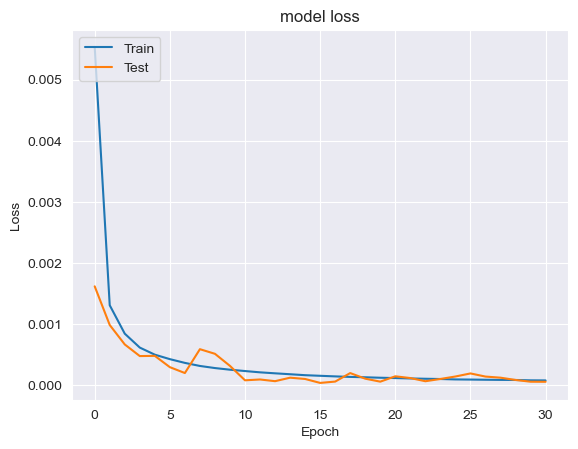

In [67]:
plot_his(history_3)

In [68]:
model_3.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 5.9617e-05 - rmse: 6.6154e-05 - mae: 5.9617e-05 - mse: 4.3764e-09 - mape: 0.0137


[5.9616679209284484e-05,
 6.615446909563616e-05,
 5.9616679209284484e-05,
 4.376413453854866e-09,
 0.013698559254407883]

In [69]:
Y_pred_3 = model_3.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [70]:
AIC_value(model_3,Y_pred_3,Y_test)

AIC:  8841.583


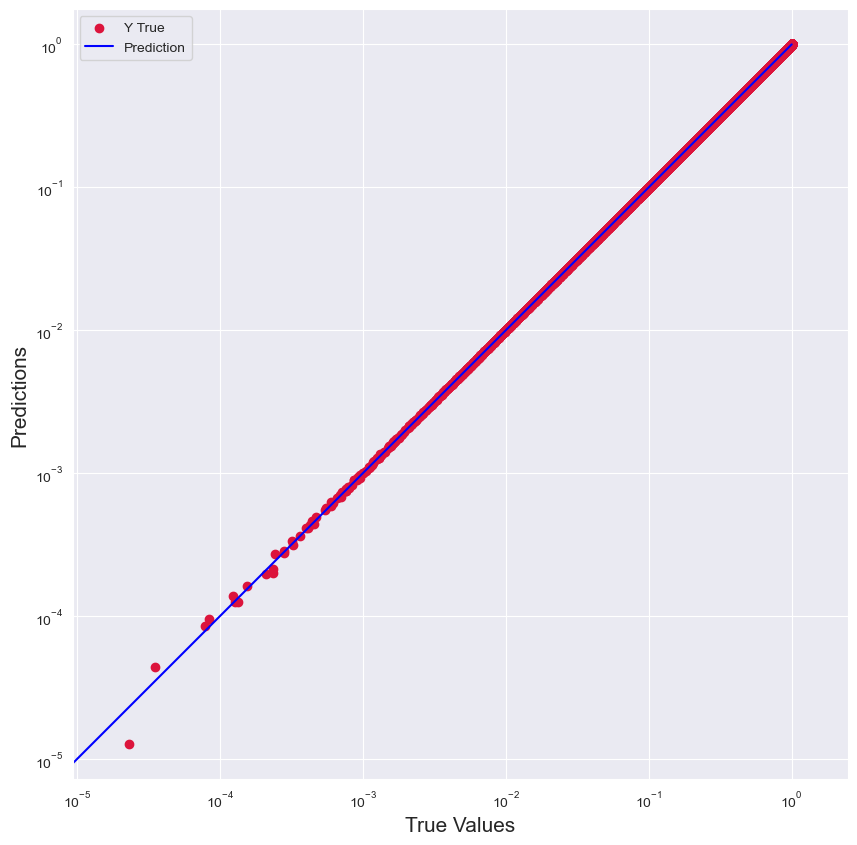

In [171]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_3, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_3), max(Y_test))
p2 = min(min(Y_pred_3), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [71]:
model_3.save('Saved_models/model_3_SOCesti.h5')

# Model 4

In [72]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(200),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100, batch_size=16,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
49744/49744 [==============================] - 121s 2ms/step - loss: 0.0039 - rmse: 0.0167 - mae: 0.0039 - mse: 2.7967e-04 - mape: 3.5860 - val_loss: 0.0013 - val_rmse: 0.0014 - val_mae: 0.0013 - val_mse: 1.9262e-06 - val_mape: 1.0479
Epoch 2/100
49744/49744 [==============================] - 120s 2ms/step - loss: 9.4470e-04 - rmse: 0.0012 - mae: 9.4470e-04 - mse: 1.5532e-06 - mape: 0.8315 - val_loss: 4.4691e-04 - val_rmse: 5.2085e-04 - val_mae: 4.4691e-04 - val_mse: 2.7128e-07 - val_mape: 0.4285
Epoch 3/100
49744/49744 [==============================] - 120s 2ms/step - loss: 5.7752e-04 - rmse: 7.5557e-04 - mae: 5.7752e-04 - mse: 5.7088e-07 - mape: 4.5417 - val_loss: 2.2986e-04 - val_rmse: 2.5681e-04 - val_mae: 2.2986e-04 - val_mse: 6.5951e-08 - val_mape: 0.1507
Epoch 4/100
49744/49744 [==============================] - 118s 2ms/step - loss: 4.1525e-04 - rmse: 5.4090e-04 - mae: 4.1525e-04 - mse: 2.9257e-07 - mape: 1.5627 - val_loss: 2.4371e-04 - val_rmse: 2.6911e-04 - val_m

49744/49744 [==============================] - 129s 3ms/step - loss: 4.8526e-05 - rmse: 6.2939e-05 - mae: 4.8526e-05 - mse: 3.9613e-09 - mape: 0.1085 - val_loss: 5.7695e-05 - val_rmse: 6.3981e-05 - val_mae: 5.7695e-05 - val_mse: 4.0936e-09 - val_mape: 0.0289
Epoch 31: early stopping
CPU times: total: 1h 40min 32s
Wall time: 1h 7min 2s


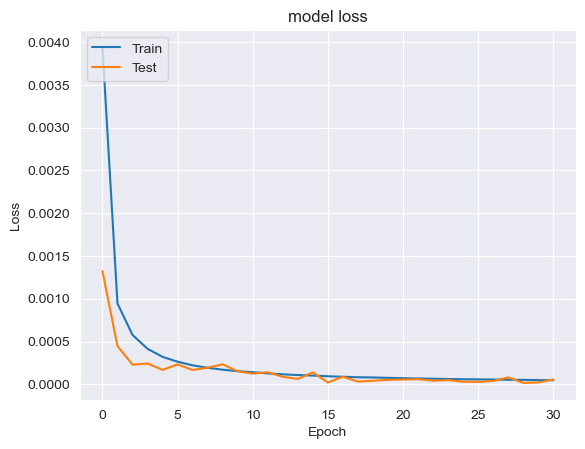

In [73]:
plot_his(history_4)

In [74]:
model_4.evaluate(X_test,Y_test)

6218/6218 [==============================] - 14s 2ms/step - loss: 5.7695e-05 - rmse: 6.3981e-05 - mae: 5.7695e-05 - mse: 4.0936e-09 - mape: 0.0289


[5.7695120631251484e-05,
 6.39813079033047e-05,
 5.7695120631251484e-05,
 4.0936076750597294e-09,
 0.028883660212159157]

In [75]:
Y_pred_4 = model_4.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [76]:
AIC_value(model_4,Y_pred_4,Y_test)

AIC:  23141.582


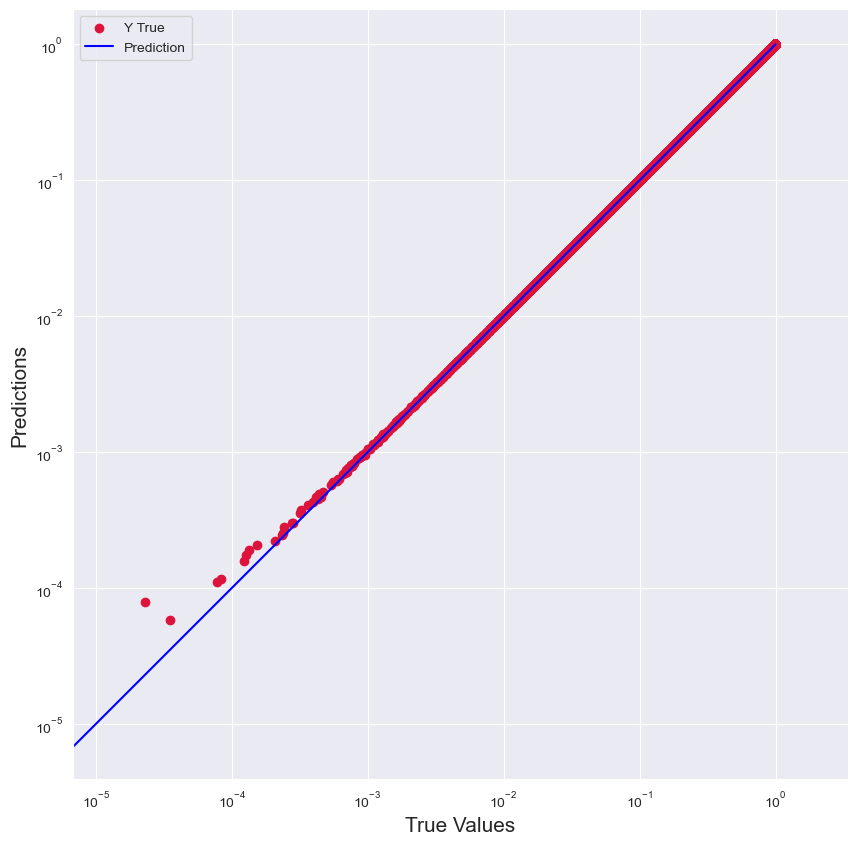

In [172]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_4, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_4), max(Y_test))
p2 = min(min(Y_pred_4), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [77]:
model_4.save('Saved_models/model_4_SOCesti.h5')

# LSTM


# Model 5

In [78]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'linear',return_sequences=True, input_shape=(4,1)),
                               tf.keras.layers.LSTM(10,activation='linear'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/50
24872/24872 [==============================] - 166s 6ms/step - loss: 0.0123 - rmse: 0.0750 - mae: 0.0123 - mse: 0.0056 - mape: 10.3624 - val_loss: 0.0023 - val_rmse: 0.0029 - val_mae: 0.0023 - val_mse: 8.2291e-06 - val_mape: 1.2206
Epoch 2/50
24872/24872 [==============================] - 154s 6ms/step - loss: 0.0018 - rmse: 0.0024 - mae: 0.0018 - mse: 5.6162e-06 - mape: 8.9753 - val_loss: 0.0018 - val_rmse: 0.0019 - val_mae: 0.0018 - val_mse: 3.6872e-06 - val_mape: 1.4347
Epoch 3/50
24872/24872 [==============================] - 177s 7ms/step - loss: 0.0011 - rmse: 0.0015 - mae: 0.0011 - mse: 2.1140e-06 - mape: 2.9625 - val_loss: 9.6169e-04 - val_rmse: 0.0011 - val_mae: 9.6169e-04 - val_mse: 1.2670e-06 - val_mape: 0.5167
Epoch 4/50
24872/24872 [==============================] - 175s 7ms/step - loss: 8.1243e-04 - rmse: 0.0010 - mae: 8.1243e-04 - mse: 1.0946e-06 - mape: 2.8433 - val_loss: 7.0248e-04 - val_rmse: 8.7312e-04 - val_mae: 7.0248e-04 - val_mse: 7.6233e-07 - val_mape

24872/24872 [==============================] - 155s 6ms/step - loss: 1.0704e-04 - rmse: 1.4677e-04 - mae: 1.0704e-04 - mse: 2.1541e-08 - mape: 0.5804 - val_loss: 7.2322e-05 - val_rmse: 1.1240e-04 - val_mae: 7.2322e-05 - val_mse: 1.2634e-08 - val_mape: 0.0845
Epoch 32/50
24872/24872 [==============================] - 155s 6ms/step - loss: 1.0516e-04 - rmse: 1.4429e-04 - mae: 1.0516e-04 - mse: 2.0820e-08 - mape: 0.7282 - val_loss: 1.4950e-04 - val_rmse: 1.7309e-04 - val_mae: 1.4950e-04 - val_mse: 2.9961e-08 - val_mape: 0.0625
Epoch 33/50
24872/24872 [==============================] - 156s 6ms/step - loss: 1.0091e-04 - rmse: 1.3921e-04 - mae: 1.0091e-04 - mse: 1.9378e-08 - mape: 0.7594 - val_loss: 6.9529e-05 - val_rmse: 9.9435e-05 - val_mae: 6.9529e-05 - val_mse: 9.8873e-09 - val_mape: 0.0453
Epoch 34/50
24872/24872 [==============================] - 156s 6ms/step - loss: 9.9285e-05 - rmse: 1.3746e-04 - mae: 9.9285e-05 - mse: 1.8894e-08 - mape: 0.6072 - val_loss: 9.1152e-05 - val_rmse: 1.

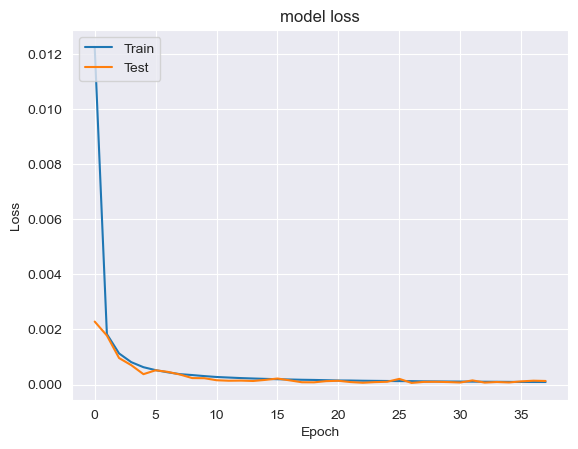

In [79]:
plot_his(history_5)

In [80]:
model_5.evaluate(X_test,Y_test)

6218/6218 [==============================] - 18s 3ms/step - loss: 1.2880e-04 - rmse: 1.5317e-04 - mae: 1.2880e-04 - mse: 2.3462e-08 - mape: 0.0979


[0.00012879936548415571,
 0.00015317411452997476,
 0.00012879936548415571,
 2.3462311204980324e-08,
 0.0978546291589737]

In [81]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [82]:
prediction_5 = model_5.predict(X_test)

6218/6218 [==============================] - 17s 3ms/step


In [83]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25701.582


In [84]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


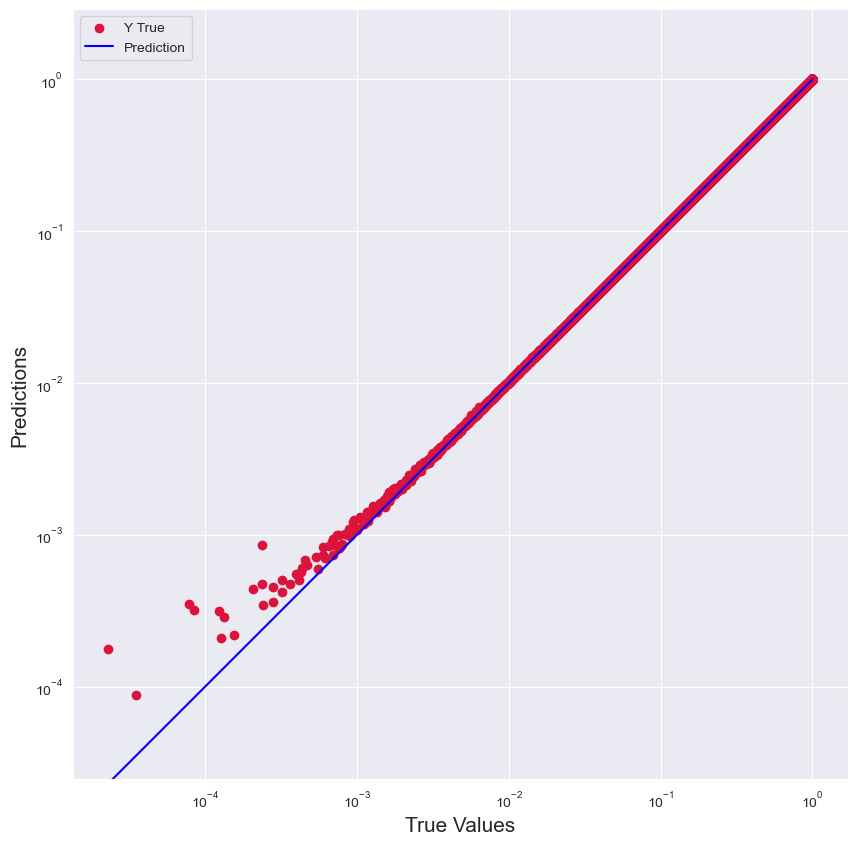

In [173]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_5, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_5), max(Y_test))
p2 = min(min(prediction_5), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [85]:
model_5.save('Saved_models/model_5_SOCesti.h5')

# Model 6

In [86]:
%%time
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(4,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
24872/24872 [==============================] - 184s 7ms/step - loss: 0.0110 - rmse: 0.0624 - mae: 0.0110 - mse: 0.0039 - mape: 16.3581 - val_loss: 0.0025 - val_rmse: 0.0027 - val_mae: 0.0025 - val_mse: 7.5338e-06 - val_mape: 1.3237
Epoch 2/40
24872/24872 [==============================] - 178s 7ms/step - loss: 0.0020 - rmse: 0.0026 - mae: 0.0020 - mse: 6.9994e-06 - mape: 6.3662 - val_loss: 0.0018 - val_rmse: 0.0021 - val_mae: 0.0018 - val_mse: 4.3205e-06 - val_mape: 1.0482
Epoch 3/40
24872/24872 [==============================] - 178s 7ms/step - loss: 0.0012 - rmse: 0.0016 - mae: 0.0012 - mse: 2.4088e-06 - mape: 2.3314 - val_loss: 5.5780e-04 - val_rmse: 6.5901e-04 - val_mae: 5.5780e-04 - val_mse: 4.3430e-07 - val_mape: 0.5113
Epoch 4/40
24872/24872 [==============================] - 177s 7ms/step - loss: 8.4221e-04 - rmse: 0.0011 - mae: 8.4221e-04 - mse: 1.1641e-06 - mape: 1.5949 - val_loss: 2.3888e-04 - val_rmse: 3.1400e-04 - val_mae: 2.3888e-04 - val_mse: 9.8598e-08 - val_

24872/24872 [==============================] - 173s 7ms/step - loss: 1.0429e-04 - rmse: 1.3935e-04 - mae: 1.0429e-04 - mse: 1.9418e-08 - mape: 0.5155 - val_loss: 9.6103e-05 - val_rmse: 1.1840e-04 - val_mae: 9.6103e-05 - val_mse: 1.4019e-08 - val_mape: 0.0472
Epoch 32/40
24872/24872 [==============================] - 173s 7ms/step - loss: 1.0181e-04 - rmse: 1.3617e-04 - mae: 1.0181e-04 - mse: 1.8542e-08 - mape: 0.4703 - val_loss: 1.9025e-04 - val_rmse: 2.2816e-04 - val_mae: 1.9025e-04 - val_mse: 5.2055e-08 - val_mape: 0.1205
Epoch 33/40
24872/24872 [==============================] - 176s 7ms/step - loss: 9.9490e-05 - rmse: 1.3305e-04 - mae: 9.9490e-05 - mse: 1.7701e-08 - mape: 0.3823 - val_loss: 6.9180e-05 - val_rmse: 9.6265e-05 - val_mae: 6.9180e-05 - val_mse: 9.2670e-09 - val_mape: 0.0477
Epoch 34/40
24872/24872 [==============================] - 190s 8ms/step - loss: 9.7602e-05 - rmse: 1.3075e-04 - mae: 9.7602e-05 - mse: 1.7096e-08 - mape: 0.3620 - val_loss: 8.1759e-05 - val_rmse: 1.

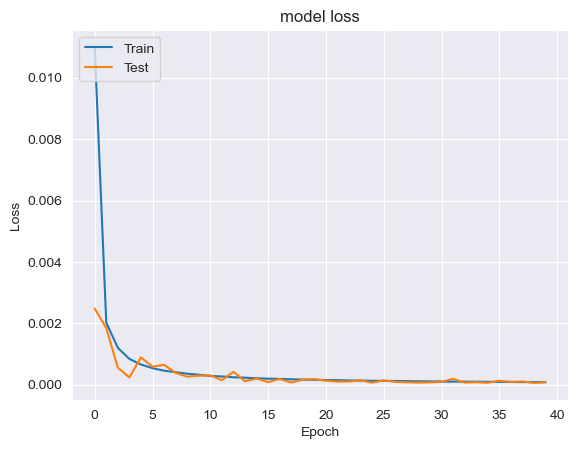

In [87]:
plot_his(history_6)

In [88]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [89]:
model_6.evaluate(X_test,Y_test)

6218/6218 [==============================] - 24s 4ms/step - loss: 8.2913e-05 - rmse: 1.1320e-04 - mae: 8.2913e-05 - mse: 1.2814e-08 - mape: 0.0548


[8.29130585771054e-05,
 0.00011319930490572006,
 8.29130585771054e-05,
 1.2814082239742675e-08,
 0.05477464571595192]

In [90]:
prediction_6 = model_6.predict(X_test)

6218/6218 [==============================] - 21s 3ms/step


In [91]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65841.586


In [92]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


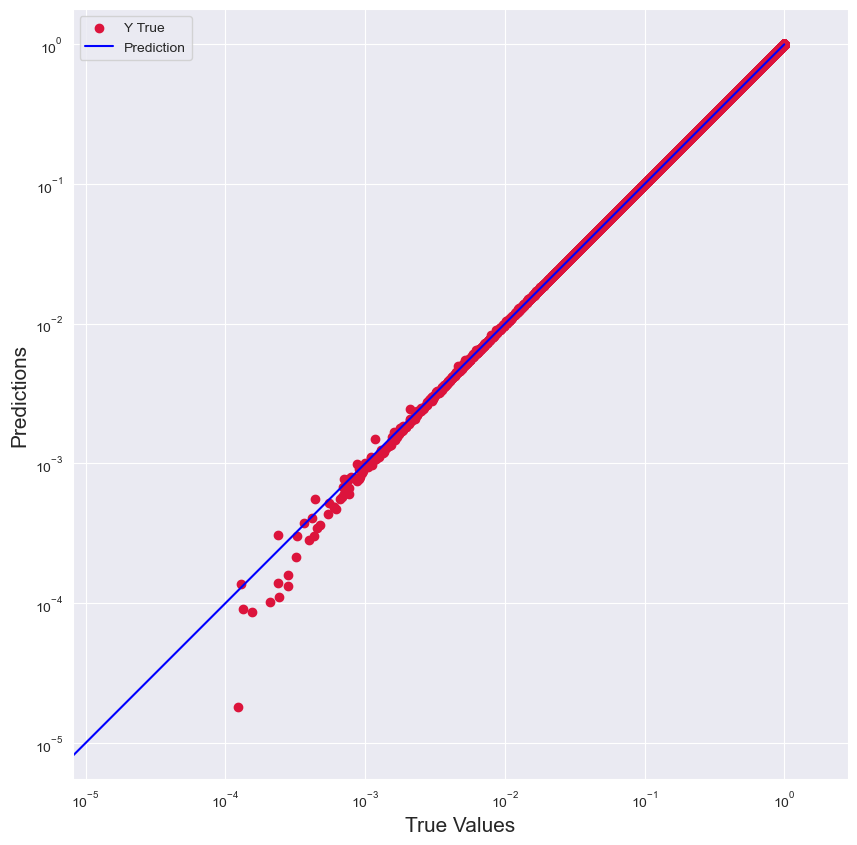

In [174]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_6, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_6), max(Y_test))
p2 = min(min(prediction_6), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [93]:
model_6.save('Saved_models/model_6_SOCesti.h5')

# Model 7

In [94]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'linear',return_sequences=True, input_shape=(4,1)),
                               tf.keras.layers.LSTM(10,activation='linear'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 128,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
6218/6218 [==============================] - 53s 8ms/step - loss: 0.0305 - rmse: 0.1292 - mae: 0.0305 - mse: 0.0167 - mape: 27.5425 - val_loss: 0.0022 - val_rmse: 0.0028 - val_mae: 0.0022 - val_mse: 7.7784e-06 - val_mape: 1.6672
Epoch 2/70
6218/6218 [==============================] - 48s 8ms/step - loss: 0.0042 - rmse: 0.0054 - mae: 0.0042 - mse: 2.9574e-05 - mape: 5.9746 - val_loss: 0.0012 - val_rmse: 0.0015 - val_mae: 0.0012 - val_mse: 2.2646e-06 - val_mape: 0.7298
Epoch 3/70
6218/6218 [==============================] - 50s 8ms/step - loss: 0.0030 - rmse: 0.0039 - mae: 0.0030 - mse: 1.4934e-05 - mape: 5.2818 - val_loss: 0.0012 - val_rmse: 0.0015 - val_mae: 0.0012 - val_mse: 2.1586e-06 - val_mape: 0.6641
Epoch 4/70
6218/6218 [==============================] - 49s 8ms/step - loss: 0.0025 - rmse: 0.0032 - mae: 0.0025 - mse: 1.0384e-05 - mape: 8.0792 - val_loss: 0.0056 - val_rmse: 0.0056 - val_mae: 0.0056 - val_mse: 3.1797e-05 - val_mape: 3.9276
Epoch 5/70
6218/6218 [=========

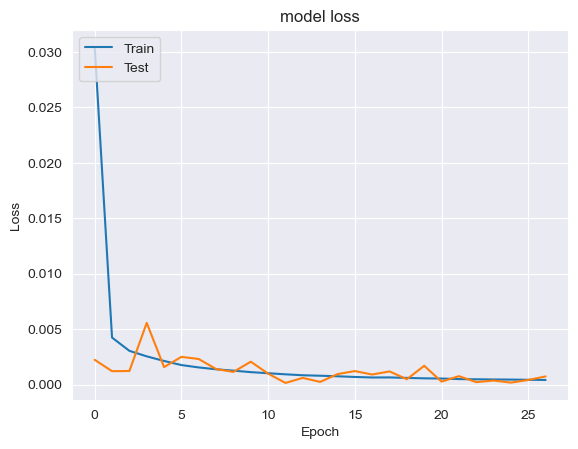

In [95]:
plot_his(history_7)

In [96]:
prediction_7 = model_7.predict(X_test)

6218/6218 [==============================] - 18s 3ms/step


In [97]:
model_7.evaluate(X_test,Y_test)

6218/6218 [==============================] - 22s 3ms/step - loss: 7.3029e-04 - rmse: 7.5369e-04 - mae: 7.3029e-04 - mse: 5.6805e-07 - mape: 0.4764


[0.0007302870508283377,
 0.0007536917109973729,
 0.0007302870508283377,
 5.680512344952149e-07,
 0.4763793647289276]

In [98]:
AIC_value(model_7,prediction_7,Y_test)

AIC:  11201.583


In [99]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4, 30)             3840      
                                                                 
 lstm_5 (LSTM)               (None, 10)                1640      
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


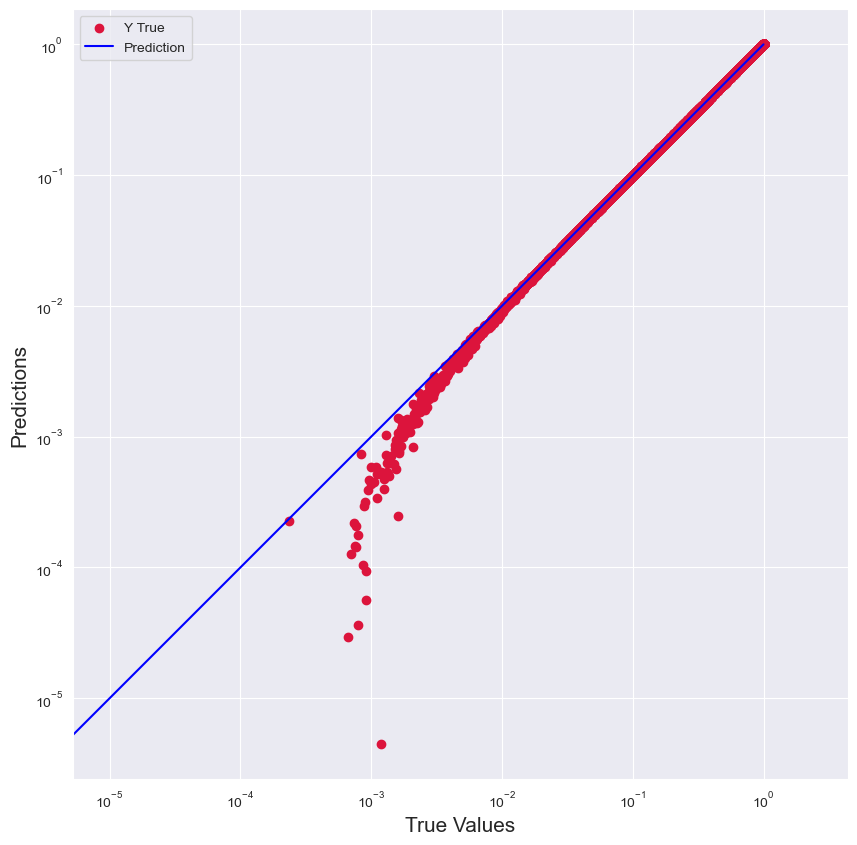

In [175]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_7, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_7), max(Y_test))
p2 = min(min(prediction_7), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [100]:
model_7.save('Saved_models/model_7_SOCesti.h5')

In [101]:
# Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
# prediction_7 = np.asarray(prediction_7).astype('float32').reshape((-1,1))


# # Calculate the negative log-likelihood of the model's parameters based on the training data
# nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=prediction_7[:198976]))

# # Calculate the number of parameters in the model
# num_params = model_7.count_params()

# # Calculate the AIC value for the model
# aic = 2 * num_params - 2 * nll

# # Print the AIC value
# print("AIC: ", aic.numpy())

In [102]:
# AIC_value(model_7,prediction_7[:198976],Y_test)  # becaus logitis are geetting shape error

# Model 8

In [103]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(4,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='linear'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=64,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
12436/12436 [==============================] - 135s 10ms/step - loss: 0.0103 - rmse: 0.0771 - mae: 0.0103 - mse: 0.0059 - mape: 8.2647 - val_loss: 6.2016e-04 - val_rmse: 7.7925e-04 - val_mae: 6.2016e-04 - val_mse: 6.0723e-07 - val_mape: 0.6594
Epoch 2/40
12436/12436 [==============================] - 123s 10ms/step - loss: 7.1425e-04 - rmse: 9.5262e-04 - mae: 7.1425e-04 - mse: 9.0748e-07 - mape: 2.5686 - val_loss: 3.9171e-04 - val_rmse: 5.4307e-04 - val_mae: 3.9171e-04 - val_mse: 2.9492e-07 - val_mape: 0.4125
Epoch 3/40
12436/12436 [==============================] - 127s 10ms/step - loss: 4.1241e-04 - rmse: 5.6488e-04 - mae: 4.1241e-04 - mse: 3.1908e-07 - mape: 3.6498 - val_loss: 1.6054e-04 - val_rmse: 3.3285e-04 - val_mae: 1.6054e-04 - val_mse: 1.1079e-07 - val_mape: 0.1812
Epoch 4/40
12436/12436 [==============================] - 125s 10ms/step - loss: 2.8986e-04 - rmse: 4.1799e-04 - mae: 2.8986e-04 - mse: 1.7471e-07 - mape: 1.8018 - val_loss: 1.4967e-04 - val_rmse: 2.8580

12436/12436 [==============================] - 126s 10ms/step - loss: 8.9379e-05 - rmse: 2.0427e-04 - mae: 8.9379e-05 - mse: 4.1727e-08 - mape: 0.3990 - val_loss: 8.9436e-05 - val_rmse: 2.0807e-04 - val_mae: 8.9436e-05 - val_mse: 4.3294e-08 - val_mape: 0.1007
Epoch 32/40
12436/12436 [==============================] - 122s 10ms/step - loss: 8.8061e-05 - rmse: 2.0269e-04 - mae: 8.8061e-05 - mse: 4.1081e-08 - mape: 0.4214 - val_loss: 8.8087e-05 - val_rmse: 2.0567e-04 - val_mae: 8.8087e-05 - val_mse: 4.2300e-08 - val_mape: 0.1003
Epoch 33/40
12436/12436 [==============================] - 122s 10ms/step - loss: 8.6996e-05 - rmse: 2.0115e-04 - mae: 8.6996e-05 - mse: 4.0460e-08 - mape: 0.3811 - val_loss: 7.8463e-05 - val_rmse: 1.9618e-04 - val_mae: 7.8463e-05 - val_mse: 3.8486e-08 - val_mape: 0.0835
Epoch 34/40
12436/12436 [==============================] - 128s 10ms/step - loss: 8.6486e-05 - rmse: 1.9988e-04 - mae: 8.6486e-05 - mse: 3.9951e-08 - mape: 0.4307 - val_loss: 8.2967e-05 - val_rmse

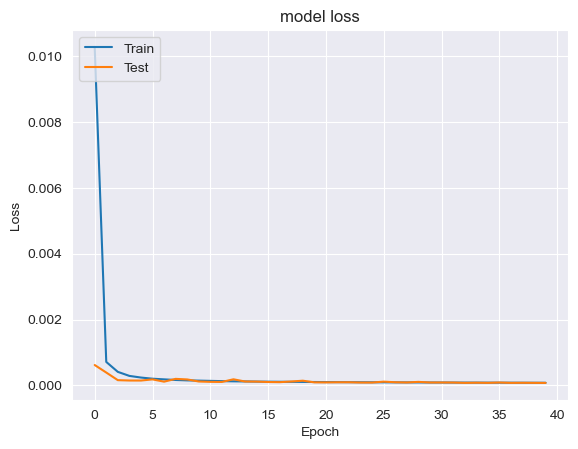

In [104]:
plot_his(history_8)

In [105]:
prediction_8 = model_8.predict(X_test)

6218/6218 [==============================] - 21s 3ms/step


In [106]:
model_8.evaluate(X_test,Y_test)

6218/6218 [==============================] - 26s 4ms/step - loss: 7.6684e-05 - rmse: 1.8799e-04 - mae: 7.6684e-05 - mse: 3.5340e-08 - mape: 0.0769


[7.668435864616185e-05,
 0.00018799025565385818,
 7.668435864616185e-05,
 3.534033865548736e-08,
 0.07694296538829803]

In [107]:
AIC_value(model_8,prediction_8, Y_test)

AIC:  65841.586


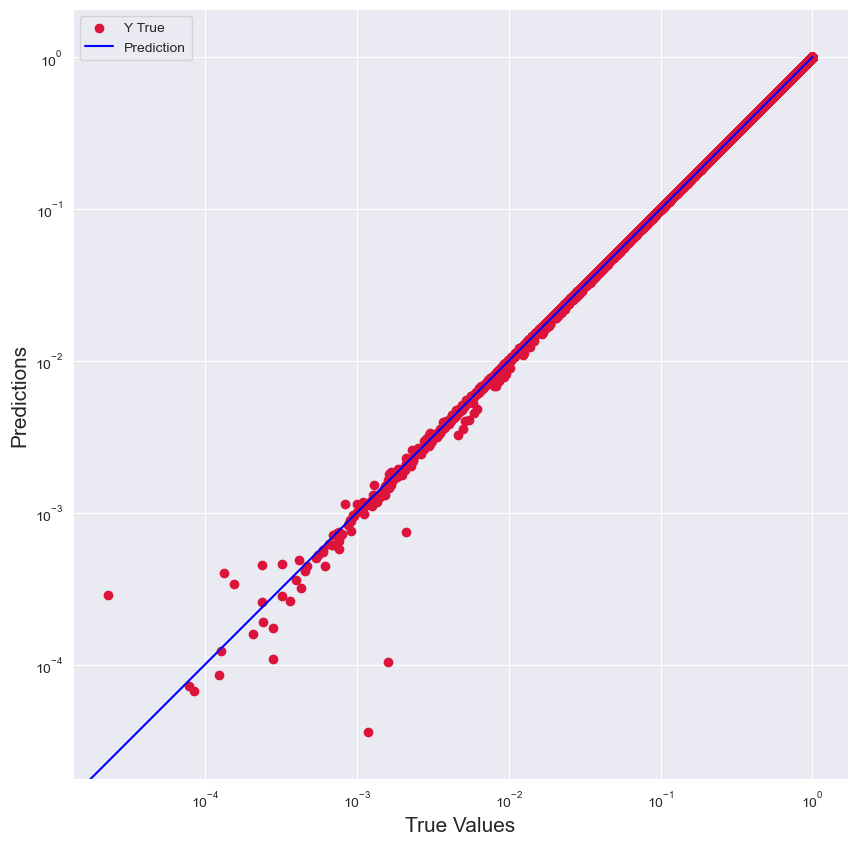

In [176]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_8, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_8), max(Y_test))
p2 = min(min(prediction_8), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [108]:
model_8.save('Saved_models/model_8_SOCesti.h5')

# CNN

# Model 9

In [111]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(4,1)),
                               tf.keras.layers.Conv1D(10,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
24872/24872 [==============================] - 81s 3ms/step - loss: 0.0094 - rmse: 0.0451 - mae: 0.0094 - mse: 0.0020 - mape: 9.5176 - val_loss: 0.0038 - val_rmse: 0.0063 - val_mae: 0.0038 - val_mse: 3.9243e-05 - val_mape: 2.7582
Epoch 2/50
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0028 - rmse: 0.0052 - mae: 0.0028 - mse: 2.7142e-05 - mape: 8.0752 - val_loss: 0.0025 - val_rmse: 0.0047 - val_mae: 0.0025 - val_mse: 2.2332e-05 - val_mape: 1.6997
Epoch 3/50
24872/24872 [==============================] - 69s 3ms/step - loss: 0.0023 - rmse: 0.0045 - mae: 0.0023 - mse: 1.9892e-05 - mape: 5.0249 - val_loss: 0.0020 - val_rmse: 0.0041 - val_mae: 0.0020 - val_mse: 1.7179e-05 - val_mape: 1.0977
Epoch 4/50
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0020 - rmse: 0.0041 - mae: 0.0020 - mse: 1.6449e-05 - mape: 2.1865 - val_loss: 0.0018 - val_rmse: 0.0039 - val_mae: 0.0018 - val_mse: 1.4923e-05 - val_mape: 0.6624
Epoch 5/50
24872/24872 [

Epoch 33/50
24872/24872 [==============================] - 71s 3ms/step - loss: 5.3361e-04 - rmse: 0.0013 - mae: 5.3361e-04 - mse: 1.6532e-06 - mape: 1.1447 - val_loss: 5.2259e-04 - val_rmse: 0.0013 - val_mae: 5.2259e-04 - val_mse: 1.5671e-06 - val_mape: 0.1205
Epoch 34/50
24872/24872 [==============================] - 71s 3ms/step - loss: 5.2238e-04 - rmse: 0.0013 - mae: 5.2238e-04 - mse: 1.6092e-06 - mape: 0.7132 - val_loss: 5.3192e-04 - val_rmse: 0.0012 - val_mae: 5.3192e-04 - val_mse: 1.5326e-06 - val_mape: 0.1231
Epoch 35/50
24872/24872 [==============================] - 70s 3ms/step - loss: 5.1189e-04 - rmse: 0.0012 - mae: 5.1189e-04 - mse: 1.5618e-06 - mape: 0.8541 - val_loss: 5.5684e-04 - val_rmse: 0.0012 - val_mae: 5.5684e-04 - val_mse: 1.4898e-06 - val_mape: 0.1632
Epoch 36/50
24872/24872 [==============================] - 70s 3ms/step - loss: 5.0040e-04 - rmse: 0.0012 - mae: 5.0040e-04 - mse: 1.5062e-06 - mape: 0.5578 - val_loss: 4.9071e-04 - val_rmse: 0.0012 - val_mae: 4.90

In [112]:
model_9.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 3.8069e-04 - rmse: 8.6700e-04 - mae: 3.8069e-04 - mse: 7.5169e-07 - mape: 0.1023


[0.0003806938184425235,
 0.0008670029346831143,
 0.0003806938184425235,
 7.516941309404501e-07,
 0.10225415974855423]

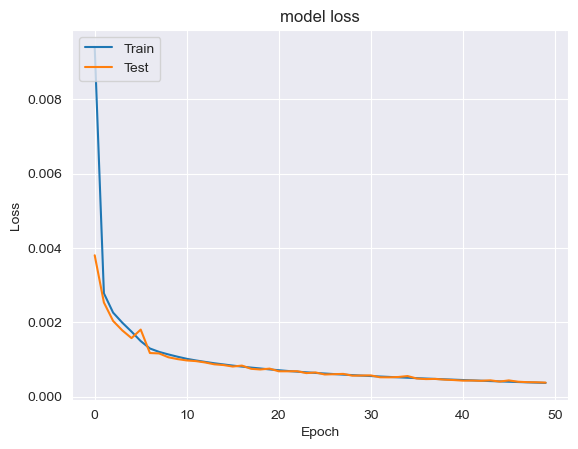

In [113]:
plot_his(history_9)

In [114]:
prediction_9 = model_9.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [115]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  521.58276


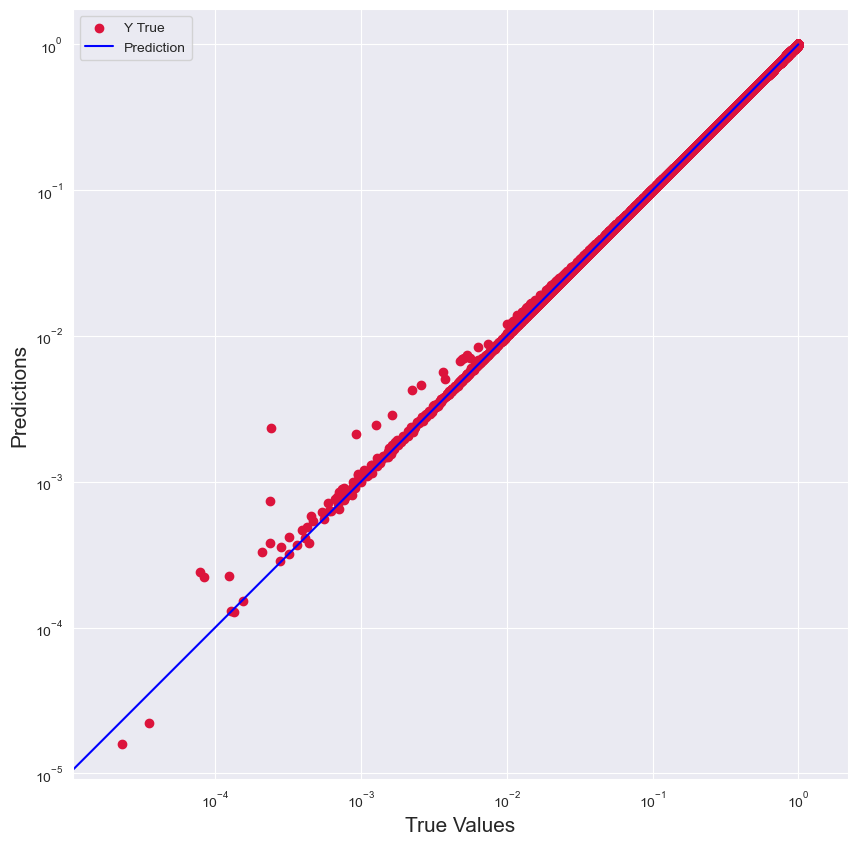

In [177]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_9, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_9), max(Y_test))
p2 = min(min(prediction_9), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [116]:
model_9.save('Saved_models/model_9_SOCesti.h5')

# Model 10

In [117]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(4,1)),
                               tf.keras.layers.Conv1D(10,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0055 - rmse: 0.0280 - mae: 0.0055 - mse: 7.8180e-04 - mape: 3.8861 - val_loss: 5.7471e-04 - val_rmse: 7.4649e-04 - val_mae: 5.7471e-04 - val_mse: 5.5725e-07 - val_mape: 0.8222
Epoch 2/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0014 - rmse: 0.0018 - mae: 0.0014 - mse: 3.3813e-06 - mape: 3.2106 - val_loss: 0.0012 - val_rmse: 0.0013 - val_mae: 0.0012 - val_mse: 1.6235e-06 - val_mape: 0.7402
Epoch 3/100
24872/24872 [==============================] - 76s 3ms/step - loss: 8.9463e-04 - rmse: 0.0012 - mae: 8.9463e-04 - mse: 1.3418e-06 - mape: 2.9994 - val_loss: 8.2442e-04 - val_rmse: 9.0395e-04 - val_mae: 8.2442e-04 - val_mse: 8.1713e-07 - val_mape: 0.3722
Epoch 4/100
24872/24872 [==============================] - 76s 3ms/step - loss: 6.4881e-04 - rmse: 8.3811e-04 - mae: 6.4881e-04 - mse: 7.0243e-07 - mape: 1.8401 - val_loss: 0.0012 - val_rmse: 0.0013 - val_mae: 0.0012 - val_mse: 1.

24872/24872 [==============================] - 81s 3ms/step - loss: 7.9212e-05 - rmse: 1.0161e-04 - mae: 7.9212e-05 - mse: 1.0324e-08 - mape: 0.4643 - val_loss: 1.0641e-04 - val_rmse: 1.1663e-04 - val_mae: 1.0641e-04 - val_mse: 1.3603e-08 - val_mape: 0.0675
Epoch 32/100
24872/24872 [==============================] - 81s 3ms/step - loss: 7.7930e-05 - rmse: 1.0019e-04 - mae: 7.7930e-05 - mse: 1.0039e-08 - mape: 0.1947 - val_loss: 5.7428e-05 - val_rmse: 6.5183e-05 - val_mae: 5.7428e-05 - val_mse: 4.2489e-09 - val_mape: 0.0354
Epoch 33/100
24872/24872 [==============================] - 81s 3ms/step - loss: 7.6122e-05 - rmse: 9.7905e-05 - mae: 7.6122e-05 - mse: 9.5853e-09 - mape: 0.1714 - val_loss: 4.8313e-05 - val_rmse: 5.3085e-05 - val_mae: 4.8313e-05 - val_mse: 2.8181e-09 - val_mape: 0.0248
Epoch 34/100
24872/24872 [==============================] - 82s 3ms/step - loss: 7.3249e-05 - rmse: 9.3971e-05 - mae: 7.3249e-05 - mse: 8.8306e-09 - mape: 0.1052 - val_loss: 7.2244e-05 - val_rmse: 9.2

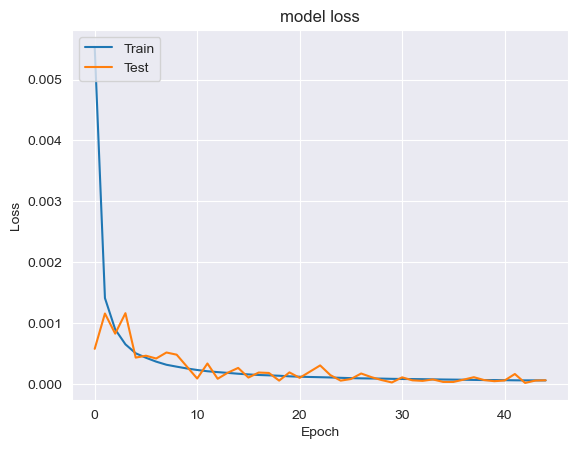

In [118]:
plot_his(history_10)

In [119]:
model_10.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 5.7929e-05 - rmse: 6.4559e-05 - mae: 5.7929e-05 - mse: 4.1679e-09 - mape: 0.0383


[5.7928999012801796e-05,
 6.455933908000588e-05,
 5.7928999012801796e-05,
 4.1679077966705336e-09,
 0.038299866020679474]

In [120]:
prediction_10 = model_10.predict(X_test)

6218/6218 [==============================] - 11s 2ms/step


In [121]:
AIC_value(model_10,prediction_10,Y_test)

AIC:  1761.5829


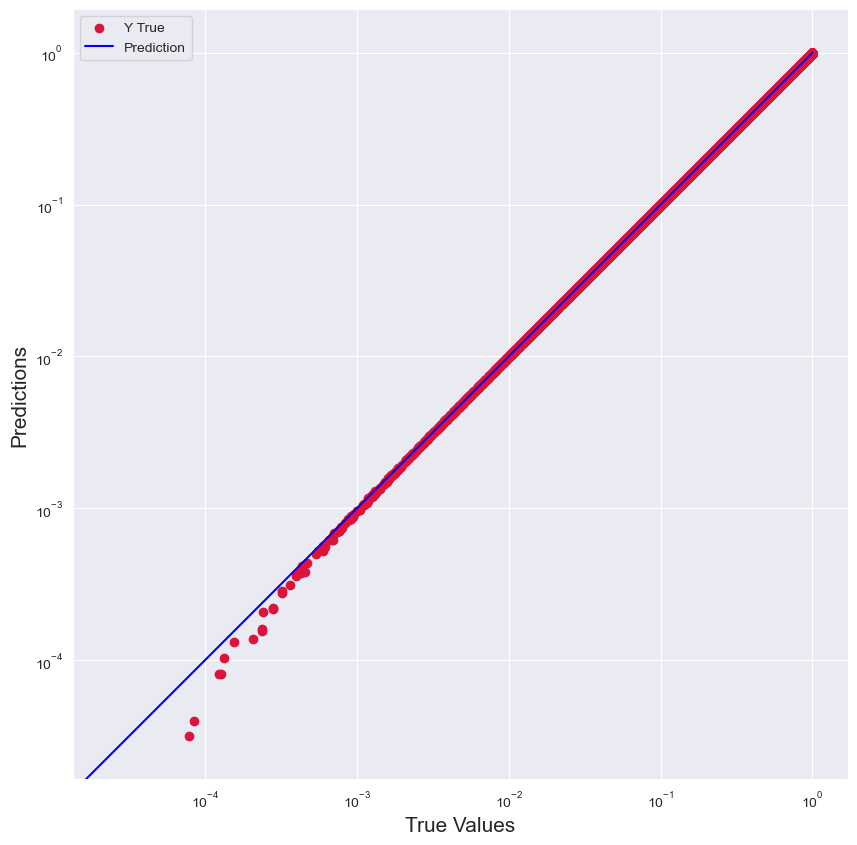

In [178]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_10, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_10), max(Y_test))
p2 = min(min(prediction_10), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [122]:
model_10.save('Saved_models/model_10_SOCesti.h5')

# Model 11

In [123]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,2,activation='linear',input_shape=(4,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="linear"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 85s 3ms/step - loss: 0.0138 - rmse: 0.0695 - mae: 0.0138 - mse: 0.0048 - mape: 53.0757 - val_loss: 0.0035 - val_rmse: 0.0063 - val_mae: 0.0035 - val_mse: 3.9728e-05 - val_mape: 5.0759
Epoch 2/100
24872/24872 [==============================] - 85s 3ms/step - loss: 0.0028 - rmse: 0.0051 - mae: 0.0028 - mse: 2.6398e-05 - mape: 31.4735 - val_loss: 0.0022 - val_rmse: 0.0042 - val_mae: 0.0022 - val_mse: 1.8049e-05 - val_mape: 2.7618
Epoch 3/100
24872/24872 [==============================] - 84s 3ms/step - loss: 0.0018 - rmse: 0.0036 - mae: 0.0018 - mse: 1.3258e-05 - mape: 17.3631 - val_loss: 0.0014 - val_rmse: 0.0033 - val_mae: 0.0014 - val_mse: 1.0654e-05 - val_mape: 1.4486
Epoch 4/100
24872/24872 [==============================] - 84s 3ms/step - loss: 0.0012 - rmse: 0.0029 - mae: 0.0012 - mse: 8.4148e-06 - mape: 1.2378 - val_loss: 0.0010 - val_rmse: 0.0027 - val_mae: 0.0010 - val_mse: 7.5571e-06 - val_mape: 0.6436
Epoch 5/100
24872

24872/24872 [==============================] - 68s 3ms/step - loss: 2.1584e-04 - rmse: 0.0011 - mae: 2.1584e-04 - mse: 1.1446e-06 - mape: 0.0453 - val_loss: 2.1276e-04 - val_rmse: 0.0011 - val_mae: 2.1276e-04 - val_mse: 1.1726e-06 - val_mape: 0.0264
Epoch 33/100
24872/24872 [==============================] - 68s 3ms/step - loss: 2.1154e-04 - rmse: 0.0011 - mae: 2.1154e-04 - mse: 1.1209e-06 - mape: 0.0417 - val_loss: 2.0963e-04 - val_rmse: 0.0011 - val_mae: 2.0963e-04 - val_mse: 1.1511e-06 - val_mape: 0.0271
Epoch 34/100
24872/24872 [==============================] - 68s 3ms/step - loss: 2.0716e-04 - rmse: 0.0010 - mae: 2.0716e-04 - mse: 1.0993e-06 - mape: 0.0336 - val_loss: 2.0470e-04 - val_rmse: 0.0011 - val_mae: 2.0470e-04 - val_mse: 1.1276e-06 - val_mape: 0.0262
Epoch 35/100
24872/24872 [==============================] - 67s 3ms/step - loss: 2.0207e-04 - rmse: 0.0010 - mae: 2.0207e-04 - mse: 1.0792e-06 - mape: 0.0353 - val_loss: 1.9831e-04 - val_rmse: 0.0011 - val_mae: 1.9831e-04 - 

24872/24872 [==============================] - 68s 3ms/step - loss: 5.3418e-05 - rmse: 8.3484e-04 - mae: 5.3418e-05 - mse: 6.9695e-07 - mape: 0.0108 - val_loss: 5.2519e-05 - val_rmse: 8.4984e-04 - val_mae: 5.2519e-05 - val_mse: 7.2222e-07 - val_mape: 0.0074
Epoch 63/100
24872/24872 [==============================] - 68s 3ms/step - loss: 5.2927e-05 - rmse: 8.3140e-04 - mae: 5.2927e-05 - mse: 6.9123e-07 - mape: 0.0122 - val_loss: 5.5767e-05 - val_rmse: 8.4615e-04 - val_mae: 5.5767e-05 - val_mse: 7.1597e-07 - val_mape: 0.0102
Epoch 64/100
24872/24872 [==============================] - 68s 3ms/step - loss: 5.2441e-05 - rmse: 8.2790e-04 - mae: 5.2441e-05 - mse: 6.8542e-07 - mape: 0.0102 - val_loss: 5.2758e-05 - val_rmse: 8.4284e-04 - val_mae: 5.2758e-05 - val_mse: 7.1038e-07 - val_mape: 0.0082
Epoch 65/100
24872/24872 [==============================] - 68s 3ms/step - loss: 5.1938e-05 - rmse: 8.2459e-04 - mae: 5.1938e-05 - mse: 6.7995e-07 - mape: 0.0091 - val_loss: 5.1705e-05 - val_rmse: 8.3

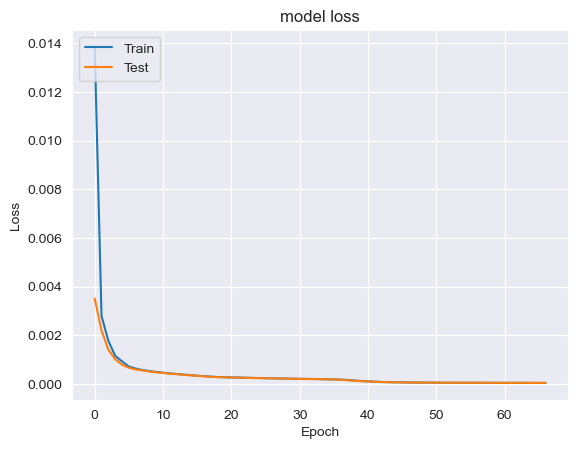

In [124]:
plot_his(history_11)

In [125]:
model_11.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 5.0549e-05 - rmse: 8.3295e-04 - mae: 5.0549e-05 - mse: 6.9381e-07 - mape: 0.0075


[5.054856956121512e-05,
 0.0008329523261636496,
 5.054856956121512e-05,
 6.938095680197875e-07,
 0.0074645038694143295]

In [126]:
prediction_11 = model_11.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [127]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  9601.583


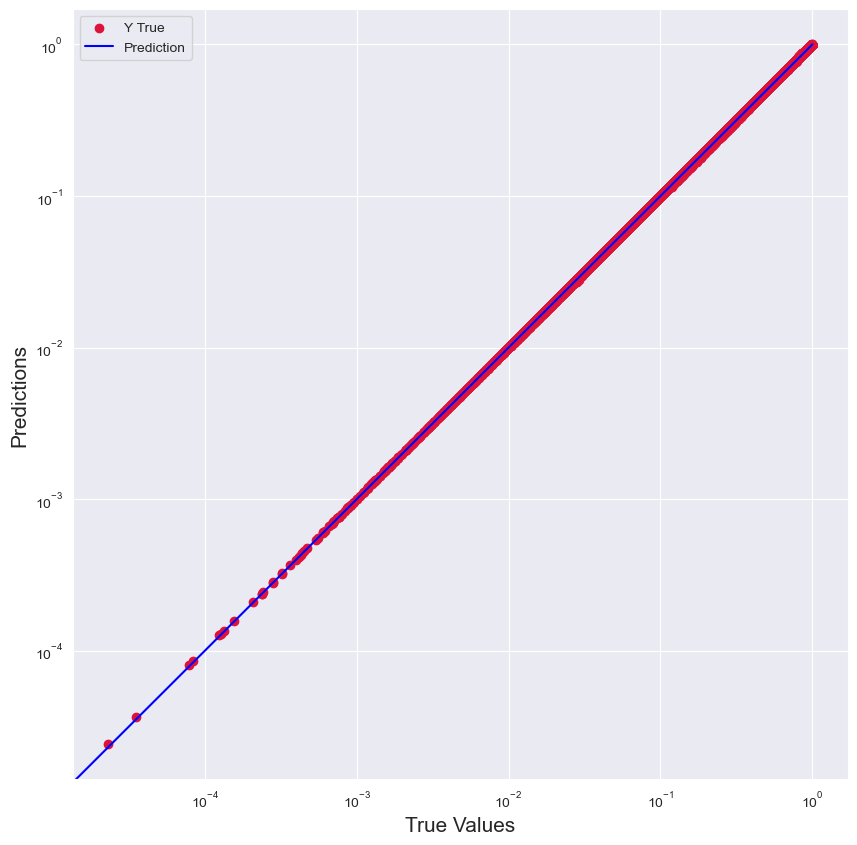

In [179]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_11, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_11), max(Y_test))
p2 = min(min(prediction_11), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [128]:
model_11.save('Saved_models/model_11_SOCesti.h5')

# Model 12

In [129]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,2,activation='linear',input_shape=(4,1)),
                               tf.keras.layers.Conv1D(8,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
24872/24872 [==============================] - 65s 3ms/step - loss: 0.0058 - rmse: 0.0337 - mae: 0.0058 - mse: 0.0011 - mape: 6.3034 - val_loss: 0.0025 - val_rmse: 0.0026 - val_mae: 0.0025 - val_mse: 6.7835e-06 - val_mape: 1.8125
Epoch 2/100
24872/24872 [==============================] - 63s 3ms/step - loss: 0.0013 - rmse: 0.0017 - mae: 0.0013 - mse: 2.8568e-06 - mape: 6.9542 - val_loss: 8.7772e-04 - val_rmse: 0.0010 - val_mae: 8.7772e-04 - val_mse: 1.0284e-06 - val_mape: 0.7781
Epoch 3/100
24872/24872 [==============================] - 63s 3ms/step - loss: 7.9949e-04 - rmse: 0.0010 - mae: 7.9949e-04 - mse: 1.0730e-06 - mape: 3.2193 - val_loss: 9.7747e-04 - val_rmse: 0.0011 - val_mae: 9.7747e-04 - val_mse: 1.1535e-06 - val_mape: 0.6174
Epoch 4/100
24872/24872 [==============================] - 63s 3ms/step - loss: 5.8890e-04 - rmse: 7.5687e-04 - mae: 5.8890e-04 - mse: 5.7285e-07 - mape: 0.5063 - val_loss: 5.5400e-04 - val_rmse: 6.4488e-04 - val_mae: 5.5400e-04 - val_mse: 4.

24872/24872 [==============================] - 61s 2ms/step - loss: 6.8912e-05 - rmse: 8.8643e-05 - mae: 6.8912e-05 - mse: 7.8575e-09 - mape: 0.1693 - val_loss: 6.9378e-06 - val_rmse: 8.9688e-06 - val_mae: 6.9378e-06 - val_mse: 8.0439e-11 - val_mape: 0.0096
Epoch 32/100
24872/24872 [==============================] - 61s 2ms/step - loss: 6.6282e-05 - rmse: 8.5063e-05 - mae: 6.6282e-05 - mse: 7.2358e-09 - mape: 0.2788 - val_loss: 6.6797e-05 - val_rmse: 7.9079e-05 - val_mae: 6.6797e-05 - val_mse: 6.2535e-09 - val_mape: 0.0504
Epoch 33/100
24872/24872 [==============================] - 61s 2ms/step - loss: 6.4874e-05 - rmse: 8.3488e-05 - mae: 6.4874e-05 - mse: 6.9703e-09 - mape: 0.2198 - val_loss: 3.3825e-05 - val_rmse: 4.2328e-05 - val_mae: 3.3825e-05 - val_mse: 1.7916e-09 - val_mape: 0.0404
Epoch 34/100
24872/24872 [==============================] - 61s 2ms/step - loss: 6.4464e-05 - rmse: 8.2720e-05 - mae: 6.4464e-05 - mse: 6.8427e-09 - mape: 0.3205 - val_loss: 2.0049e-05 - val_rmse: 2.4

24872/24872 [==============================] - 63s 3ms/step - loss: 3.6060e-05 - rmse: 4.6203e-05 - mae: 3.6060e-05 - mse: 2.1347e-09 - mape: 0.1755 - val_loss: 2.3104e-05 - val_rmse: 2.8235e-05 - val_mae: 2.3104e-05 - val_mse: 7.9723e-10 - val_mape: 0.0263
Epoch 62/100
24872/24872 [==============================] - 63s 3ms/step - loss: 3.4927e-05 - rmse: 4.5101e-05 - mae: 3.4927e-05 - mse: 2.0341e-09 - mape: 0.0966 - val_loss: 2.2483e-05 - val_rmse: 2.6244e-05 - val_mae: 2.2483e-05 - val_mse: 6.8877e-10 - val_mape: 0.0148
Epoch 63/100
24872/24872 [==============================] - 63s 3ms/step - loss: 3.4856e-05 - rmse: 4.4824e-05 - mae: 3.4856e-05 - mse: 2.0091e-09 - mape: 0.1047 - val_loss: 3.2624e-05 - val_rmse: 3.6597e-05 - val_mae: 3.2624e-05 - val_mse: 1.3393e-09 - val_mape: 0.0282
Epoch 64/100
24872/24872 [==============================] - 63s 3ms/step - loss: 3.4016e-05 - rmse: 4.3647e-05 - mae: 3.4016e-05 - mse: 1.9050e-09 - mape: 0.0875 - val_loss: 2.6760e-05 - val_rmse: 2.8

24872/24872 [==============================] - 63s 3ms/step - loss: 2.3895e-05 - rmse: 3.0851e-05 - mae: 2.3895e-05 - mse: 9.5180e-10 - mape: 0.0603 - val_loss: 1.0116e-05 - val_rmse: 1.4167e-05 - val_mae: 1.0116e-05 - val_mse: 2.0071e-10 - val_mape: 0.0067
Epoch 92/100
24872/24872 [==============================] - 63s 3ms/step - loss: 2.3333e-05 - rmse: 3.0071e-05 - mae: 2.3333e-05 - mse: 9.0424e-10 - mape: 0.0272 - val_loss: 1.8417e-05 - val_rmse: 2.1207e-05 - val_mae: 1.8417e-05 - val_mse: 4.4972e-10 - val_mape: 0.0112
Epoch 93/100
24872/24872 [==============================] - 62s 2ms/step - loss: 2.3034e-05 - rmse: 2.9467e-05 - mae: 2.3034e-05 - mse: 8.6832e-10 - mape: 0.0476 - val_loss: 1.1464e-05 - val_rmse: 1.4895e-05 - val_mae: 1.1464e-05 - val_mse: 2.2185e-10 - val_mape: 0.0097
Epoch 94/100
24872/24872 [==============================] - 62s 2ms/step - loss: 2.3188e-05 - rmse: 2.9692e-05 - mae: 2.3188e-05 - mse: 8.8162e-10 - mape: 0.0607 - val_loss: 7.8540e-06 - val_rmse: 9.5

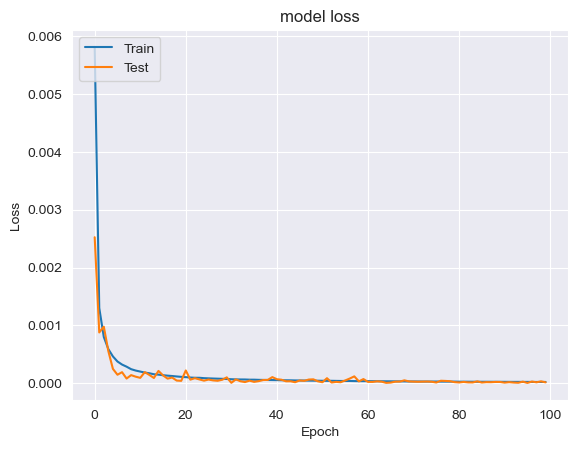

In [130]:
plot_his(history_12)

In [131]:
model_12.evaluate(X_test,Y_test)

6218/6218 [==============================] - 8s 1ms/step - loss: 1.5039e-05 - rmse: 1.8026e-05 - mae: 1.5039e-05 - mse: 3.2492e-10 - mape: 0.0121


[1.5038540368550457e-05,
 1.8025608369498514e-05,
 1.5038540368550457e-05,
 3.2492253332350174e-10,
 0.012100505642592907]

In [132]:
prediction_12 = model_12.predict(X_test)

6218/6218 [==============================] - 6s 1ms/step


In [133]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  9601.583


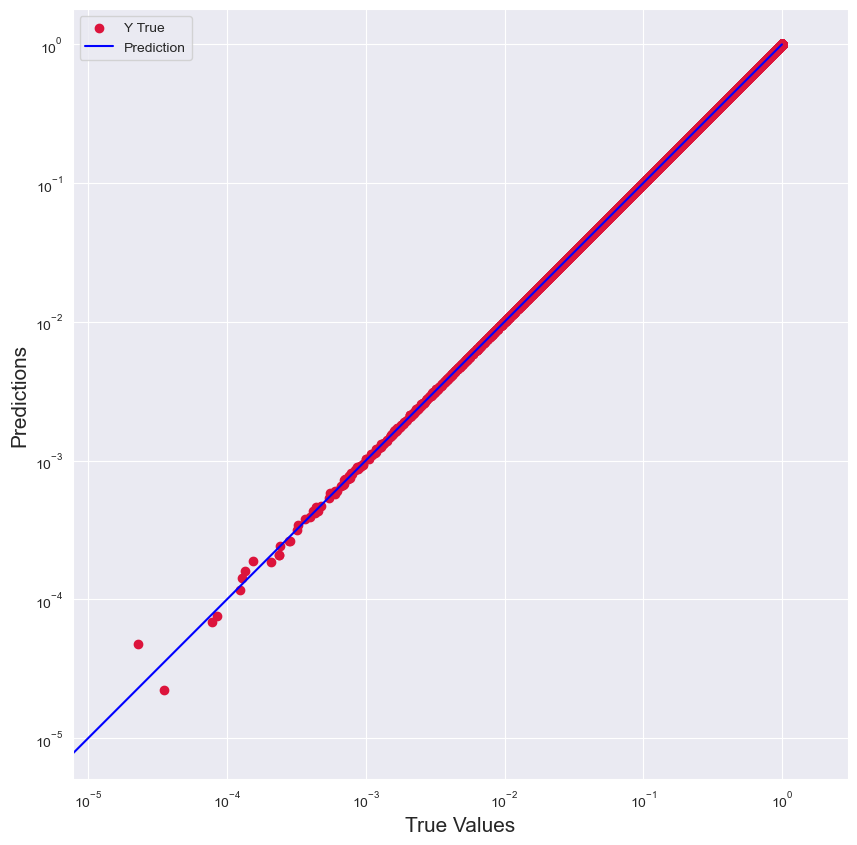

In [180]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_12, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_12), max(Y_test))
p2 = min(min(prediction_12), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [134]:
model_12.save('Saved_models/model_12_SOCesti.h5')

# Results and Discussions

In [135]:
# AIC_value(model_1,Y_pred_1,Y_test)
# AIC_value(model_2,Y_pred_2,Y_test)
# AIC_value(model_3,Y_pred_3,Y_test)
# AIC_value(model_4,Y_pred_4,Y_test)
# AIC_value(model_5,prediction_5,Y_test)
# AIC_value(model_6,prediction_6,Y_test)
# AIC_value(model_7,prediction_7[:198976],Y_test)
# AIC_value(model_8,prediction_8,Y_test)
# AIC_value(model_9,prediction_9,Y_test)
# AIC_value(model_10,prediction_10,Y_test)
# AIC_value(model_11,prediction_11,Y_test)
# AIC_value(model_12,prediction_12,Y_test)


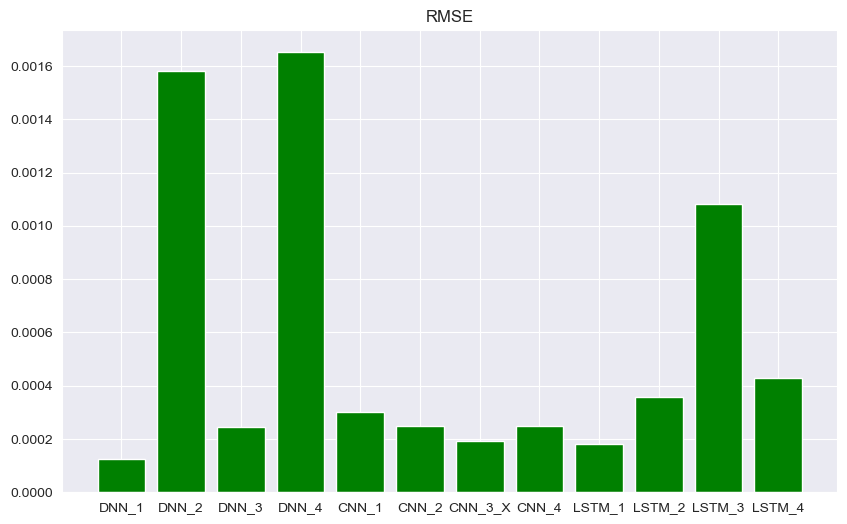

In [136]:
rmse_score = { 'DNN_1':0.000124903,'DNN_2':0.001580797,'DNN_3':0.00024606,'DNN_4':0.00165169,'CNN_1':0.00030274,
              'CNN_2':0.00024752,'CNN_3_X':0.0001937482,'CNN_4':0.00024752,'LSTM_1':0.0001818,
             'LSTM_2':0.000358092, 'LSTM_3':0.00108152, 'LSTM_4':0.000430131 }
names = list(rmse_score.keys())
values = list(rmse_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(rmse_score)), values, tick_label=names,color='green')

plt.title('RMSE')
plt.show()

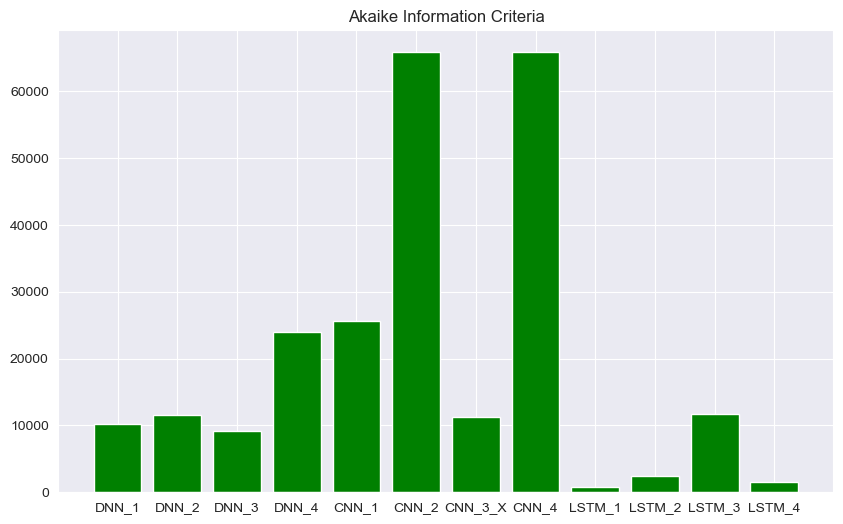

In [137]:
AIC_score = { 'DNN_1':10161.582,'DNN_2':11601.582,'DNN_3':9121.582,'DNN_4':23941.582,'CNN_1':25701.582,
              'CNN_2':65841.58,'CNN_3_X':11200.341,'CNN_4':65841.586,'LSTM_1':741.5822,
             'LSTM_2':2361.582, 'LSTM_3':11713.582, 'LSTM_4':1557.5822 }
names = list(AIC_score.keys())
values = list(AIC_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(AIC_score)), values, tick_label=names,color='green')

plt.title('Akaike Information Criteria')
plt.show()

Text(0.5, 1.0, 'Dataset')

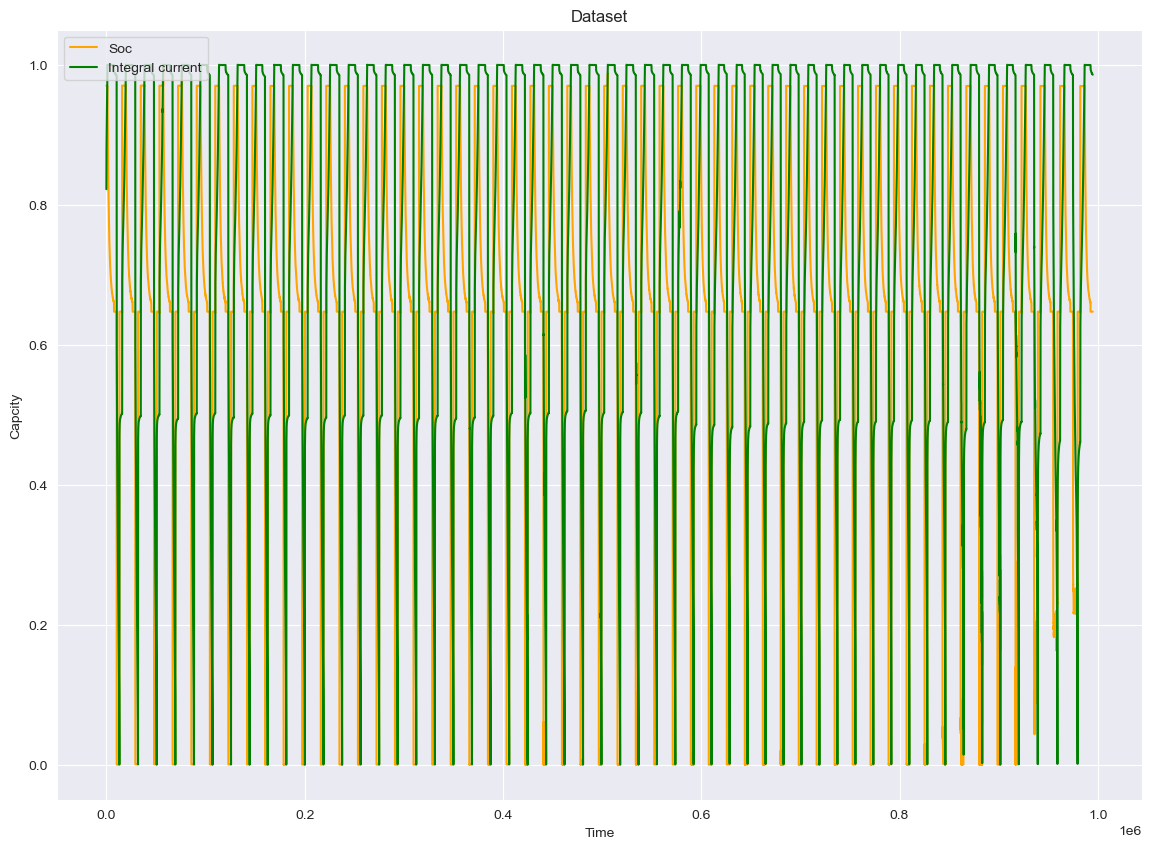

In [144]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['Current'],color='orange')
plt.plot(df['Potential'],color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [ ]:
# link for Prediction Graphs - https://stackoverflow.com/questions/58410187/how-to-plot-predicted-values-vs-the-true-value

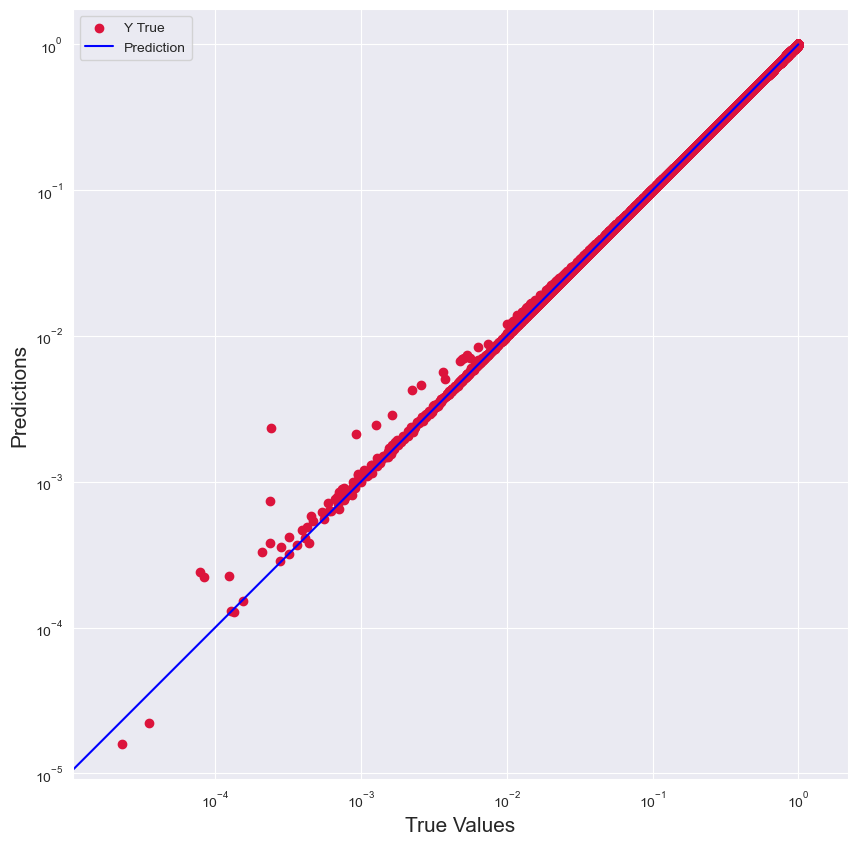

In [164]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_9, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_9), max(Y_test))
p2 = min(min(prediction_9), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

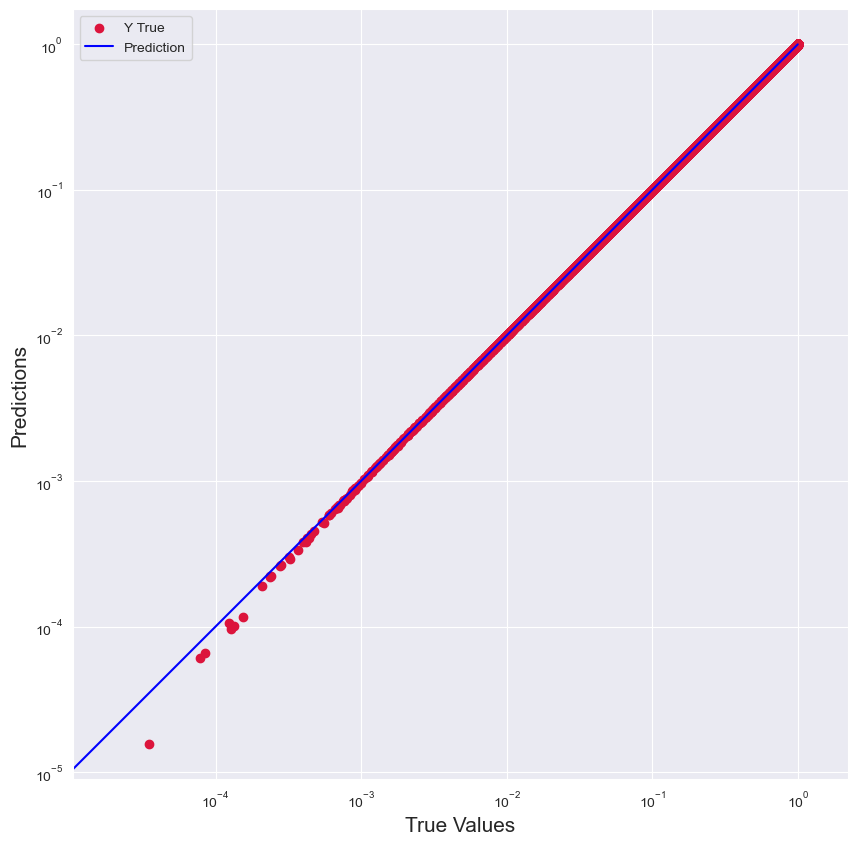

In [168]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_1, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_1), max(Y_test))
p2 = min(min(Y_pred_1), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

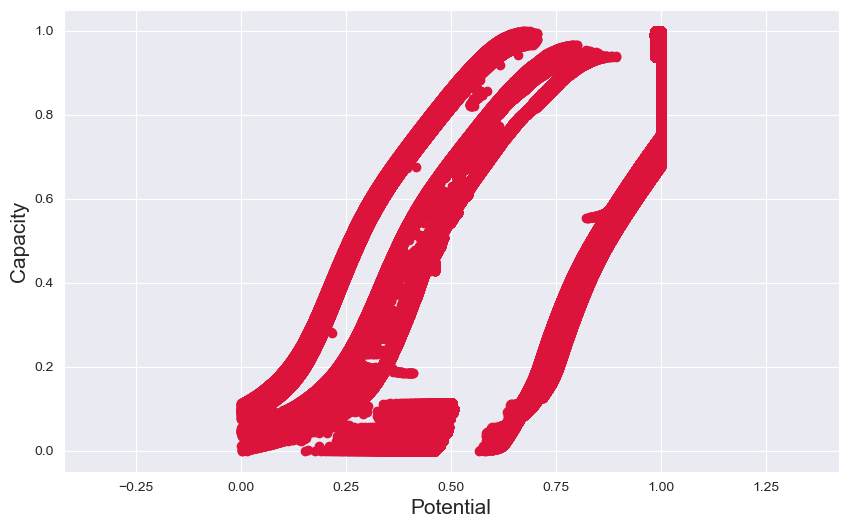

In [185]:
plt.figure(figsize=(10,6))
plt.scatter(df['Potential'], df['Capacity'], c='crimson')
plt.xlabel('Potential', fontsize=15)
plt.ylabel('Capacity', fontsize=15)
plt.axis('equal')
plt.show()